# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l2_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1789110533_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/2120063568_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1555990397_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1544078442_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/204322447_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1789110533_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success

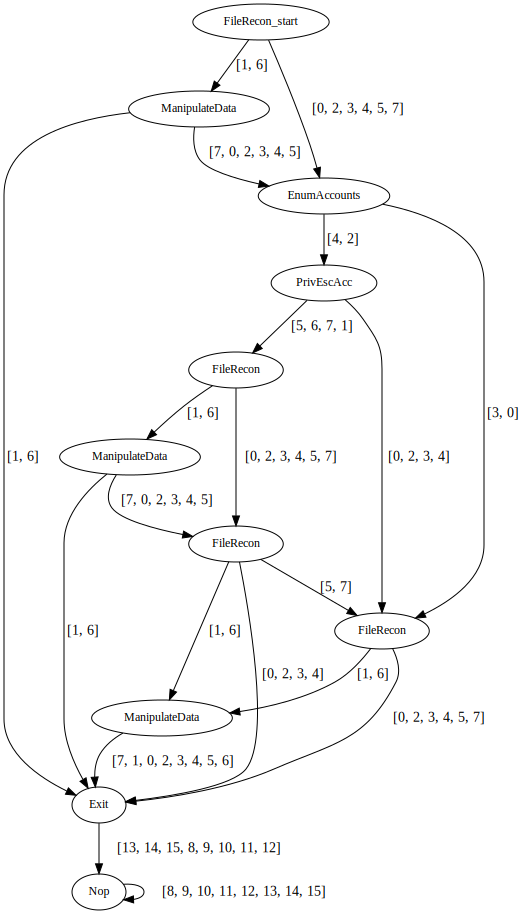

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/2120063568_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success

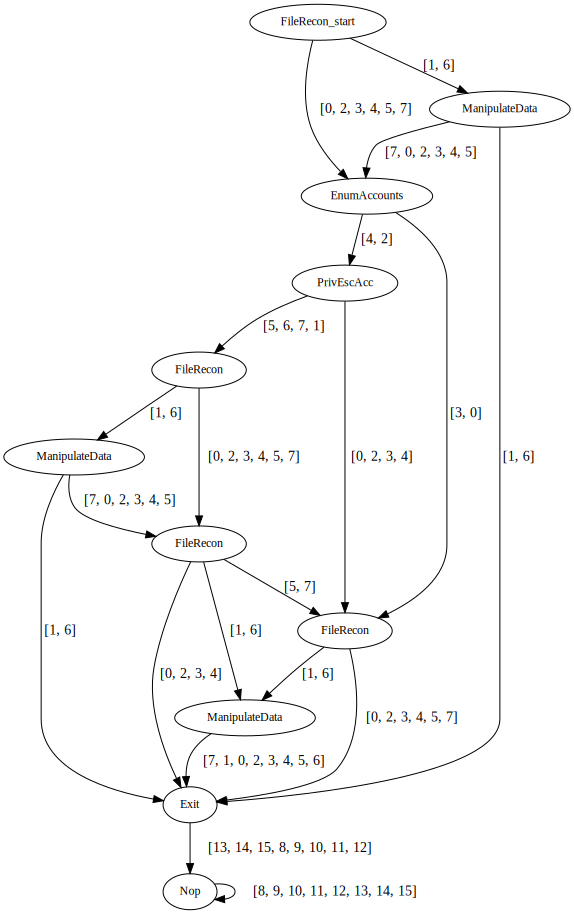

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1555990397_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


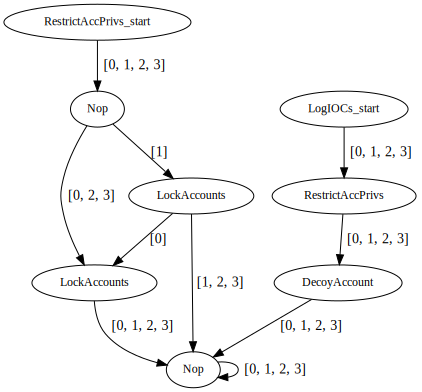

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1544078442_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


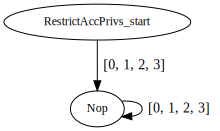

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/204322447_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
2:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
4:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, none)]
7:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnSta

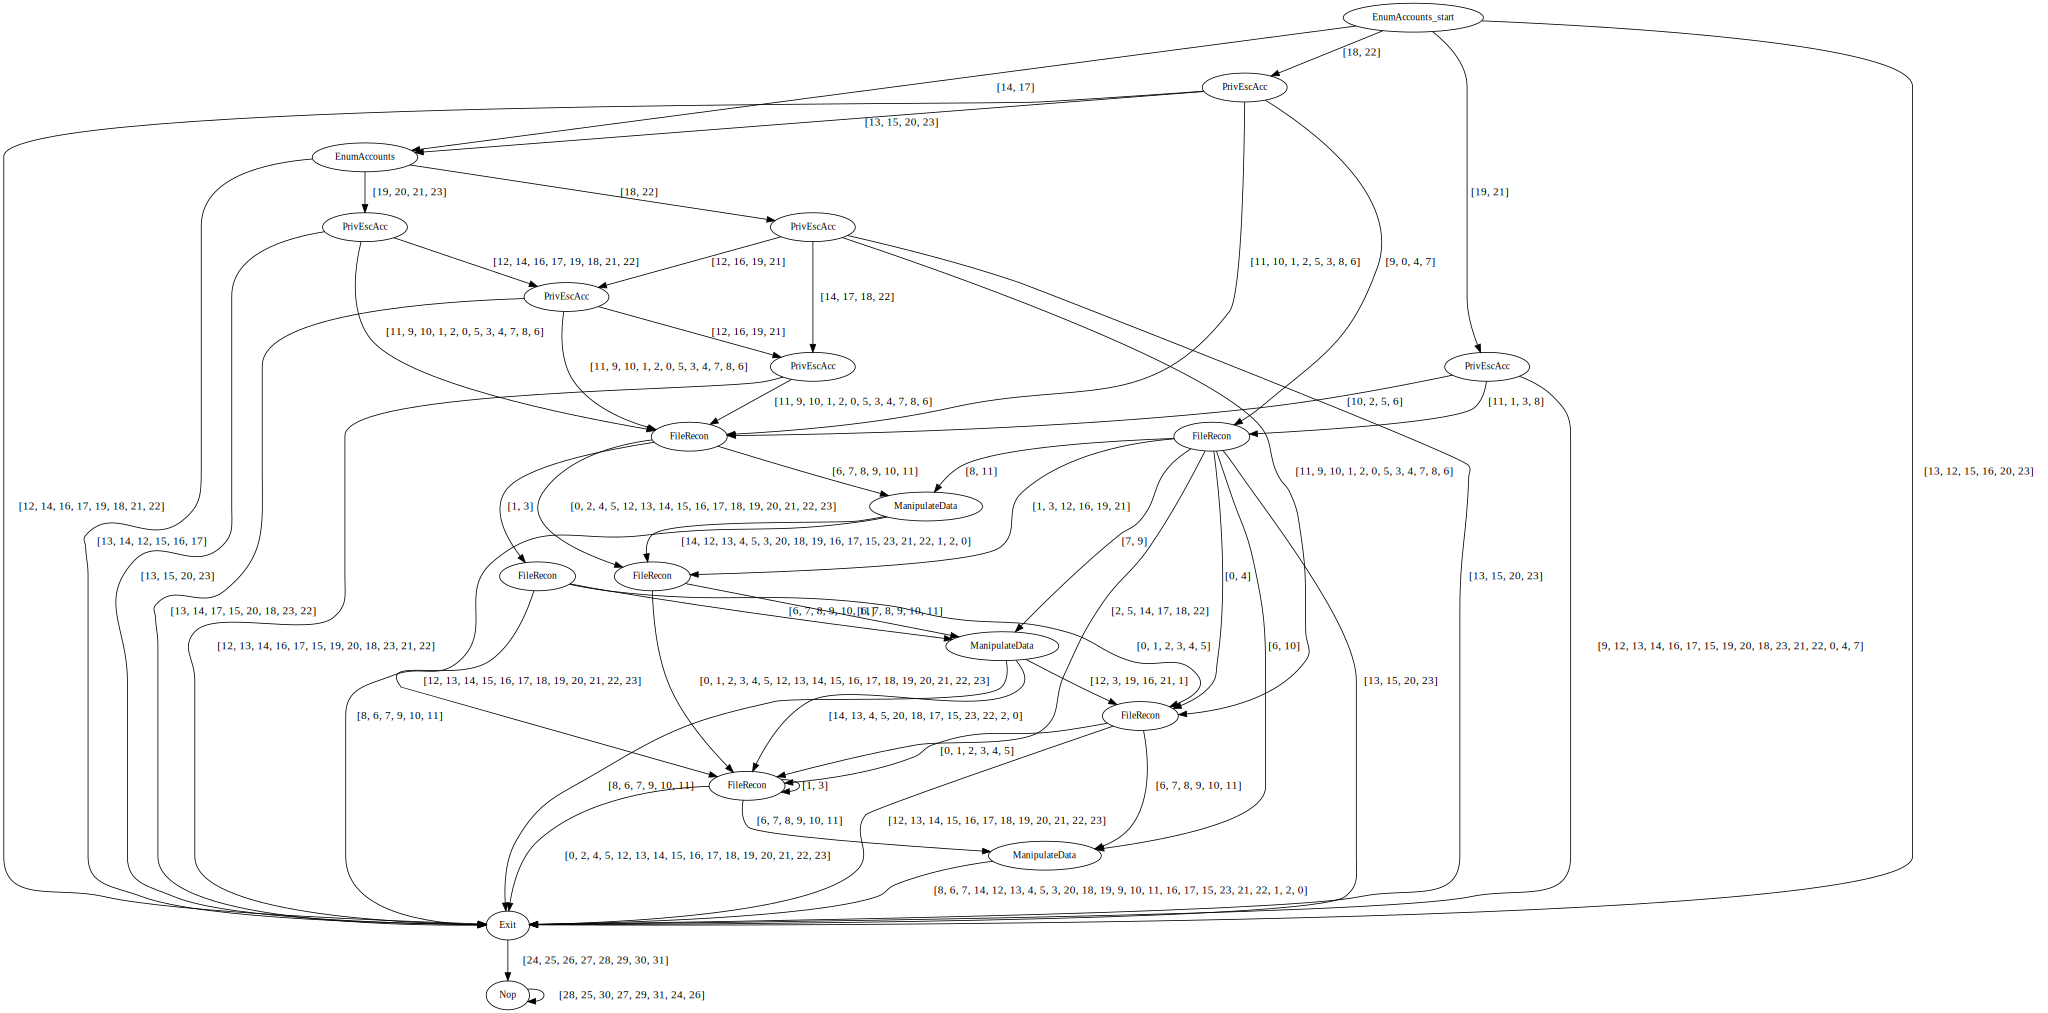

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                         none   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

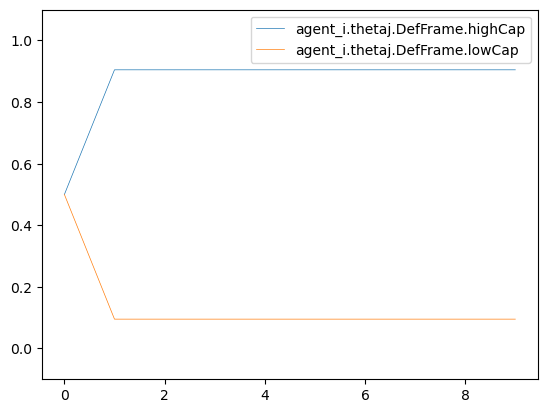

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

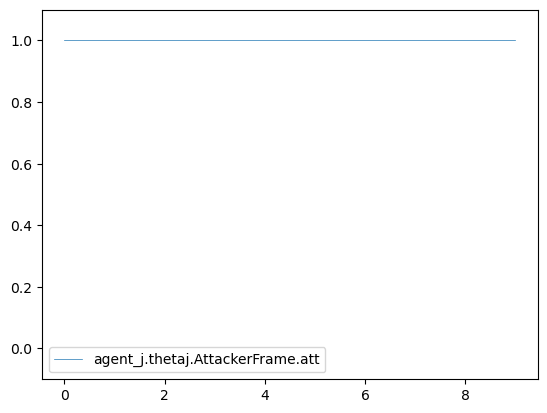

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0   EnumAccounts           LogIOCs  
1                      1.0           Exit  RestrictAccPrivs  
2                      1.0            Nop      DecoyAccount  
3                      1.0            Nop               Nop  
4                      1.0            Nop               Nop  
5                      1.0            Nop               Nop  
6                      1.0            Nop               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

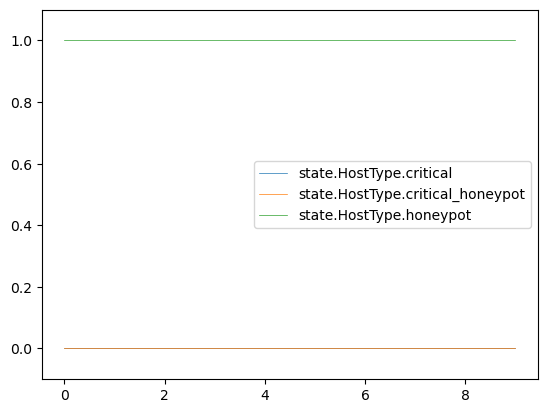

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0   EnumAccounts           LogIOCs   
1                        0.0           Exit  RestrictAccPrivs   
2                        0.0            Nop      DecoyAccount   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                         none   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

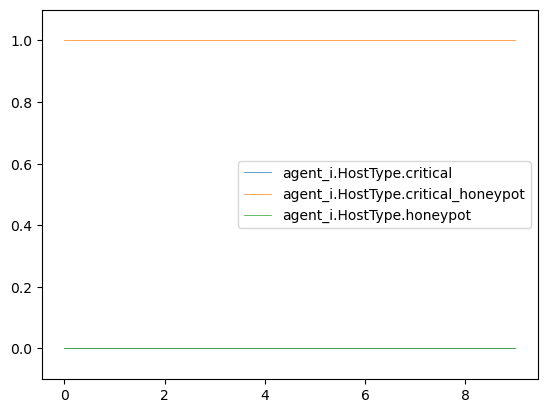

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0           LogIOCs   EnumAccounts   
1                        1.0  RestrictAccPrivs           Exit   
2                        1.0      DecoyAccount            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

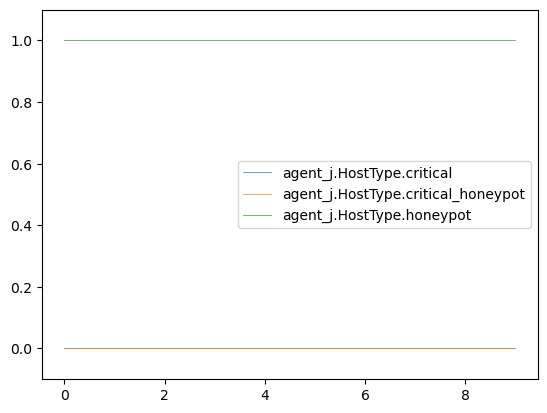

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action    agent_j.action
0                  1.0                   0.0   EnumAccounts           LogIOCs
1                  0.0                   1.0           Exit  RestrictAccPrivs
2                  0.0                   1.0            Nop      DecoyAccount
3                  0.0                   1.0            Nop               Nop
4                  0.0                   1.0            Nop               Nop
5                  0.0                   1.0            Nop               Nop
6                  0.0                   1.0            Nop               Nop
7                  0.0                   1.0            Nop               Nop
8                  0.0                   1.0            Nop               Nop
9                  0.0                   1.0            Nop               Nop

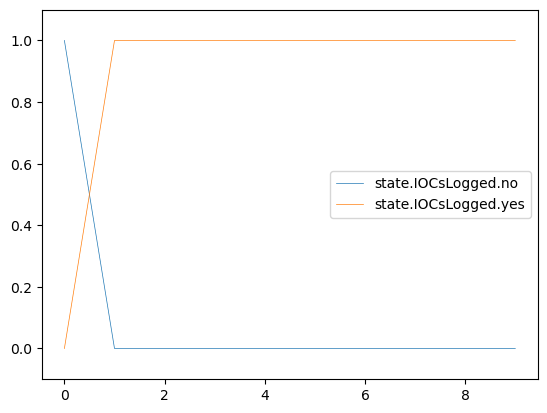

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

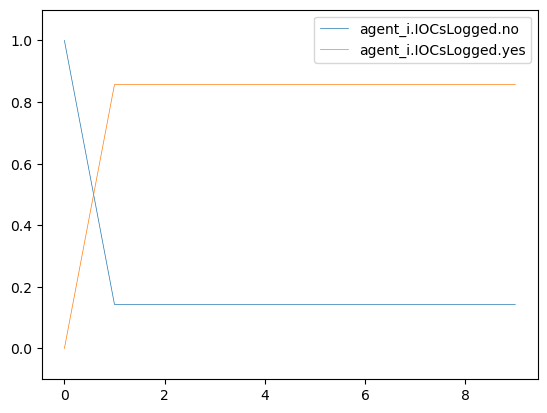

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0           LogIOCs   
1                    0.0                     1.0  RestrictAccPrivs   
2                    0.0                     1.0      DecoyAccount   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

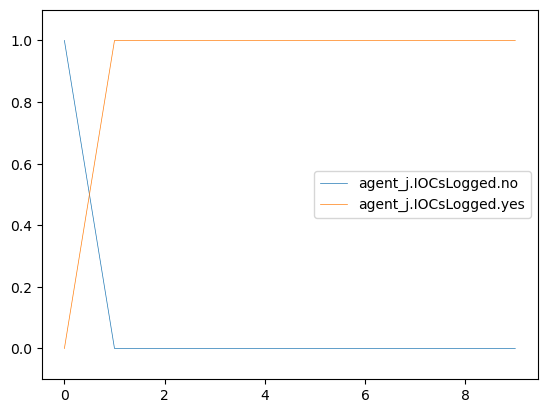

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0   EnumAccounts   
1                     0.0                     1.0           Exit   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

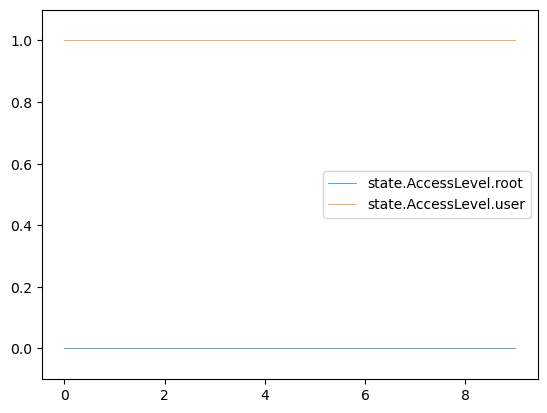

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

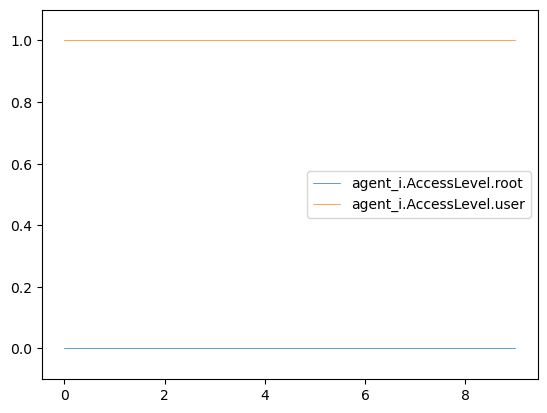

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000           LogIOCs   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000      DecoyAccount   
3                  0.000000                  1.000000               Nop   
4                  0.143059                  0.856941               Nop   
5                  0.142553                  0.857447               Nop   
6                  0.023200                  0.976800               Nop   
7                  0.035768                  0.964232               Nop   
8                  0.035558                  0.964442               Nop   
9                  0.035558                  0.964442               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

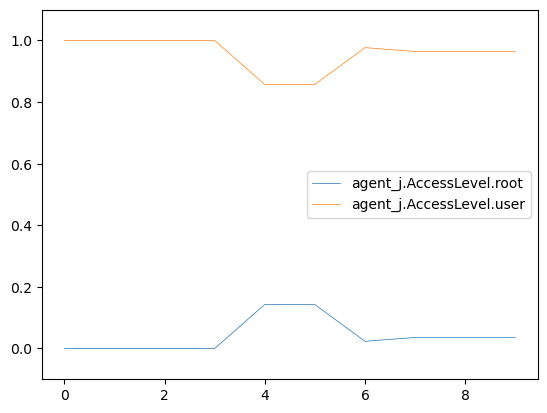

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0   EnumAccounts           LogIOCs
1                   0.0                   1.0           Exit  RestrictAccPrivs
2                   1.0                   0.0            Nop      DecoyAccount
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop               Nop
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0            Nop               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

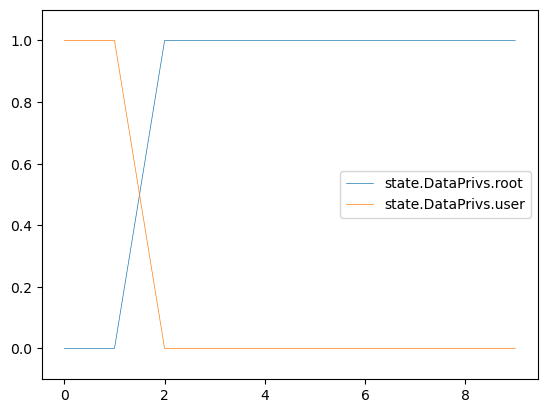

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

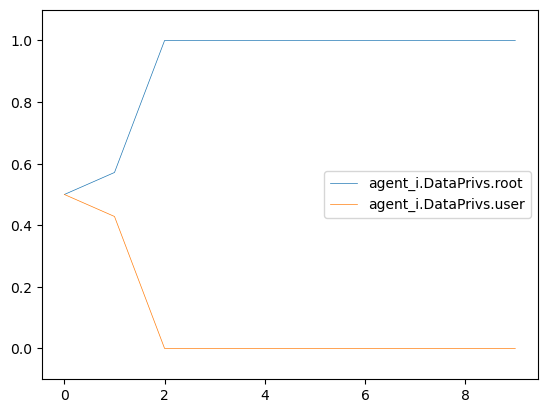

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0           LogIOCs   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0      DecoyAccount   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

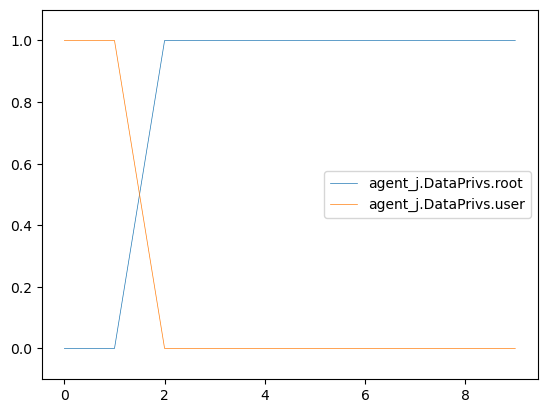

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0   EnumAccounts           LogIOCs
1                 1.0                  0.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

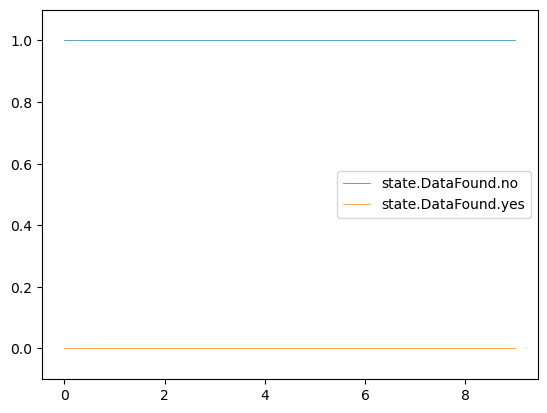

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

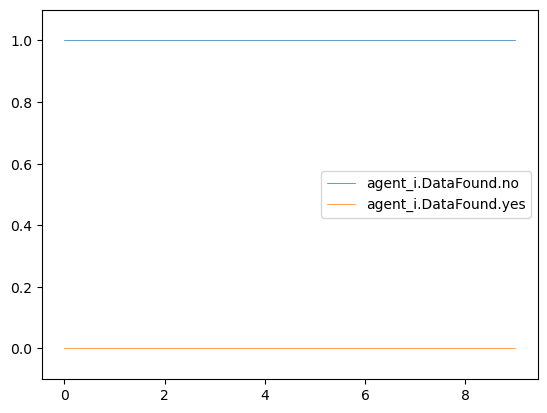

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000           LogIOCs   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000      DecoyAccount   
3              0.300031               0.699968               Nop   
4              0.620477               0.379523               Nop   
5              0.619500               0.380500               Nop   
6              0.704651               0.295349               Nop   
7              0.695578               0.304422               Nop   
8              0.695729               0.304272               Nop   
9              0.695729               0.304271               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

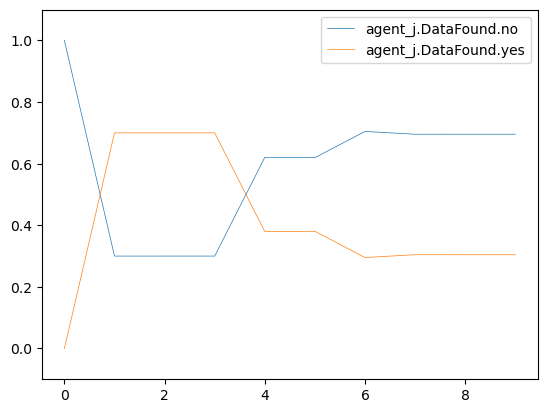

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0   EnumAccounts   
1                    1.0                     0.0           Exit   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

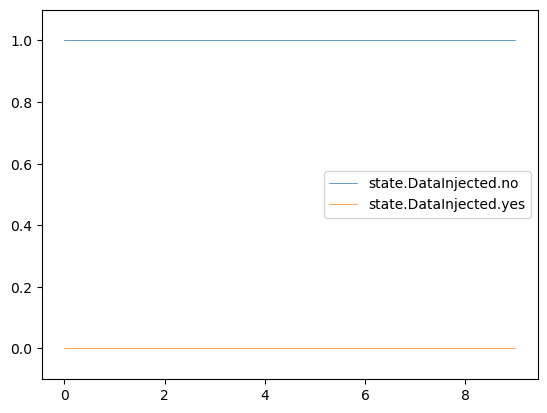

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

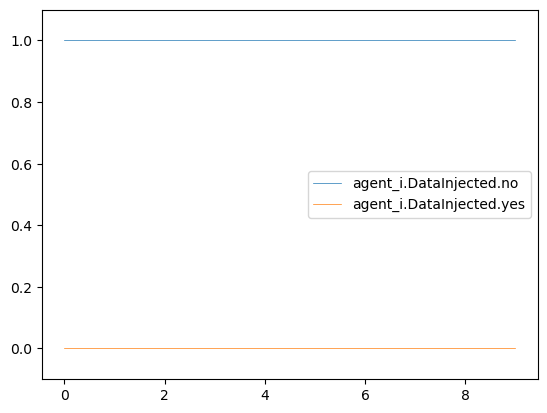

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000           LogIOCs   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000      DecoyAccount   
3                 0.370028                  0.629972               Nop   
4                 0.778201                  0.221799               Nop   
5                 0.778985                  0.221015               Nop   
6                 0.883841                  0.116159               Nop   
7                 0.872353                  0.127647               Nop   
8                 0.872511                  0.127489               Nop   
9                 0.872511                  0.127489               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

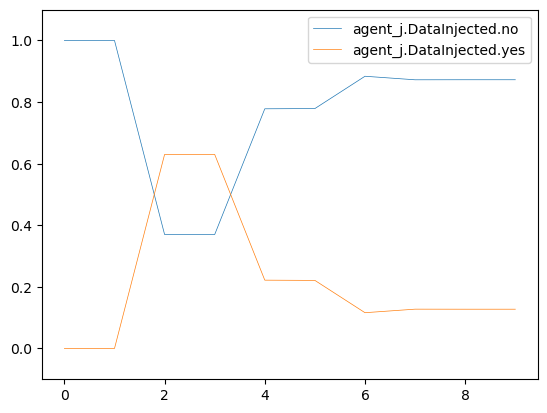

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

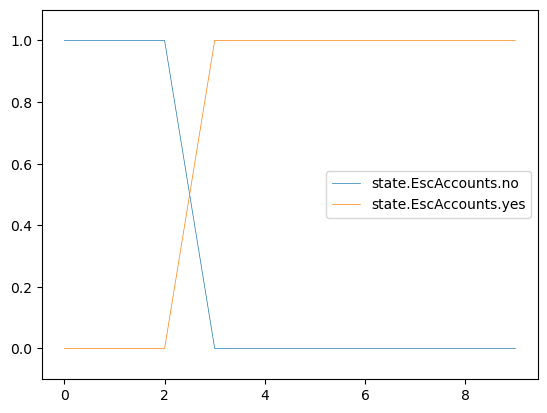

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.103687                 0.896313            Nop   
4                0.103687                 0.896313            Nop   
5                0.103687                 0.896313            Nop   
6                0.103687                 0.896313            Nop   
7                0.103687                 0.896313            Nop   
8                0.103687                 0.896313            Nop   
9                0.103687                 0.896313            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

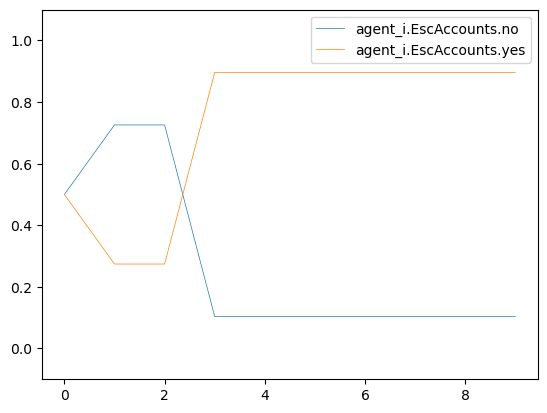

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0           LogIOCs   
1                     1.0                      0.0  RestrictAccPrivs   
2                     1.0                      0.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

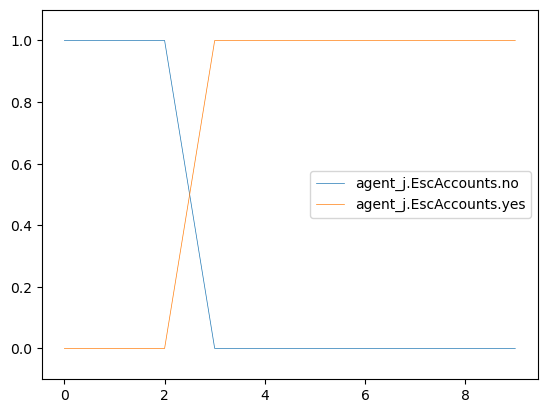

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0   EnumAccounts           LogIOCs
1                 0.0                  1.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

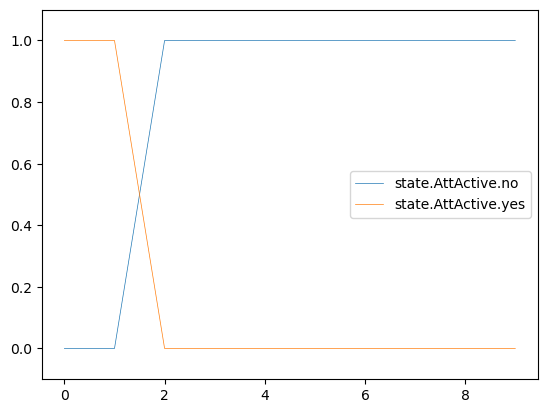

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

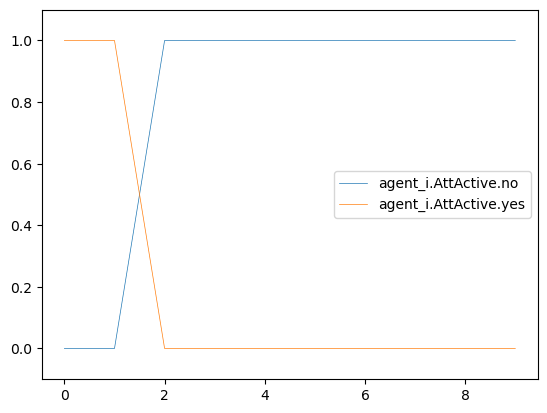

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000           1.000000e+00           LogIOCs   
1              0.000000           1.000000e+00  RestrictAccPrivs   
2              0.000000           9.999999e-01      DecoyAccount   
3              0.000052           9.999475e-01               Nop   
4              0.755909           2.440907e-01               Nop   
5              0.846534           1.534664e-01               Nop   
6              0.976799           2.320084e-02               Nop   
7              0.984701           1.529899e-02               Nop   
8              0.999964           3.639240e-05               Nop   
9              1.000000           6.204976e-08               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

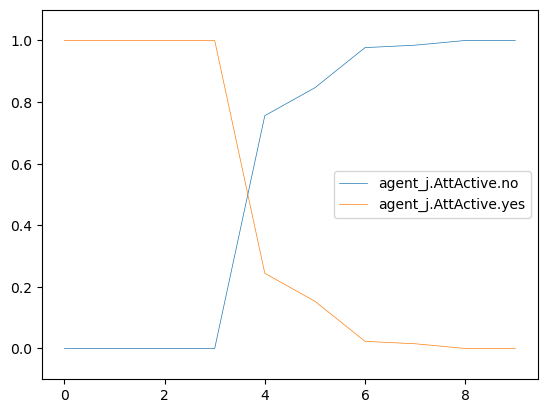

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

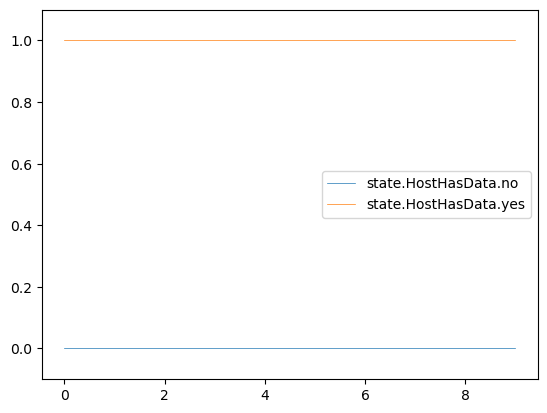

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                            auth   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

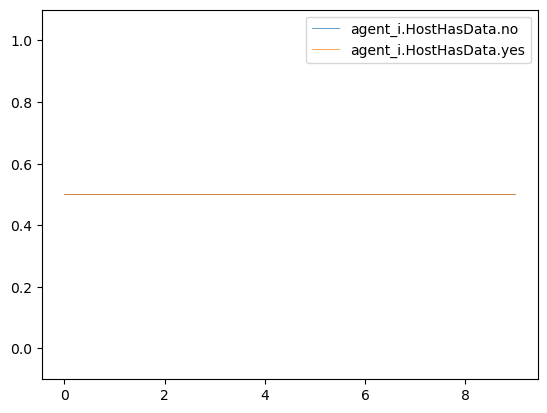

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0           LogIOCs   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

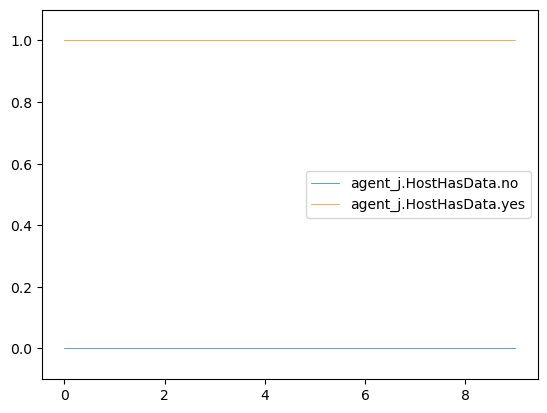

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0   EnumAccounts           LogIOCs
1                1.0                 0.0           Exit  RestrictAccPrivs
2                1.0                 0.0            Nop      DecoyAccount
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop               Nop
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0            Nop               Nop
7                1.0                 0.0            Nop               Nop
8                1.0                 0.0            Nop               Nop
9                1.0                 0.0            Nop               Nop

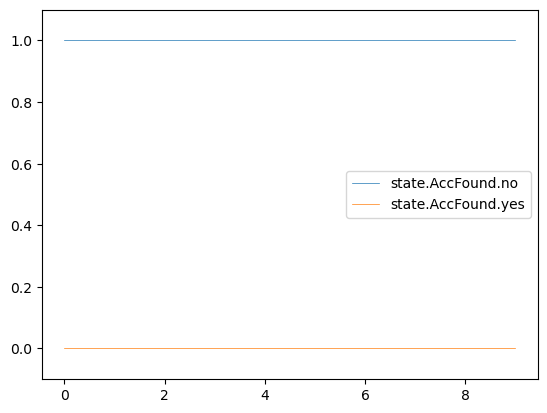

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000   EnumAccounts           LogIOCs   
1             0.943548              0.056452           Exit  RestrictAccPrivs   
2             0.943548              0.056452            Nop      DecoyAccount   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                            auth                         none   
3                          denied                         none   
4                            auth                         none   
5                            auth                         none   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

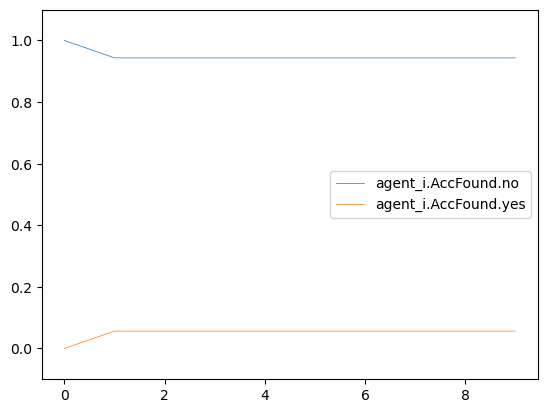

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000           LogIOCs   EnumAccounts   
1             1.000000              0.000000  RestrictAccPrivs           Exit   
2             1.000000              0.000000      DecoyAccount            Nop   
3             0.548526              0.451474               Nop            Nop   
4             0.841046              0.158954               Nop            Nop   
5             0.841498              0.158502               Nop            Nop   
6             0.958631              0.041369               Nop            Nop   
7             0.946295              0.053705               Nop            Nop   
8             0.946502              0.053498               Nop            Nop   
9             0.946502              0.053498               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

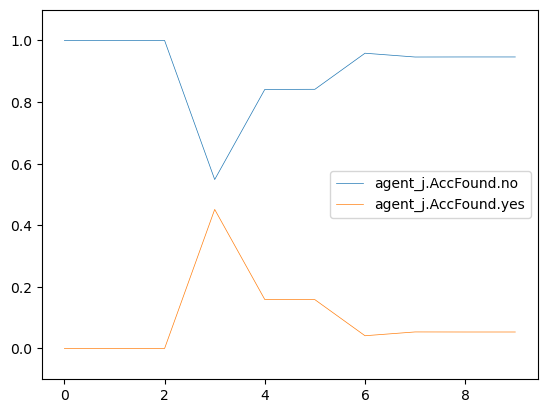

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                          denied                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

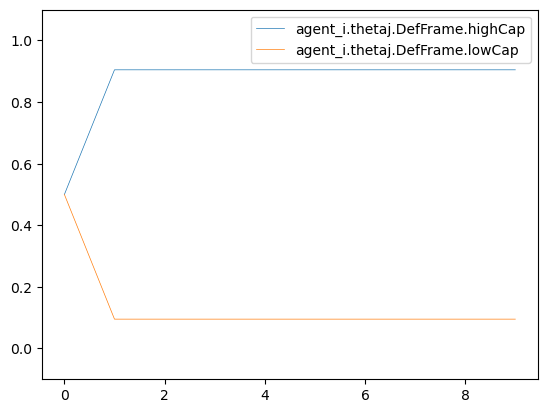

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                   login_activity
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                   login_activity
8                               1.0                             none
9                               1.0                             none

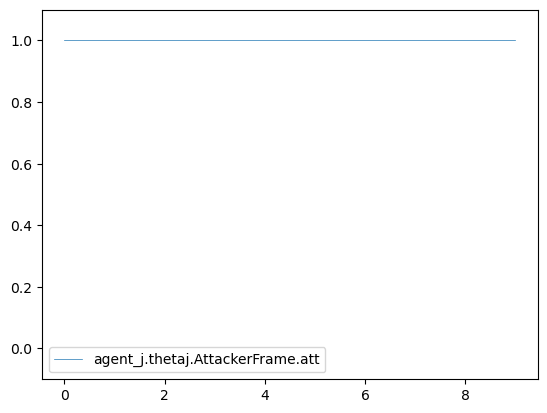

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0   EnumAccounts           LogIOCs  
1                      1.0           Exit  RestrictAccPrivs  
2                      1.0            Nop      DecoyAccount  
3                      1.0            Nop               Nop  
4                      1.0            Nop               Nop  
5                      1.0            Nop               Nop  
6                      1.0            Nop               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

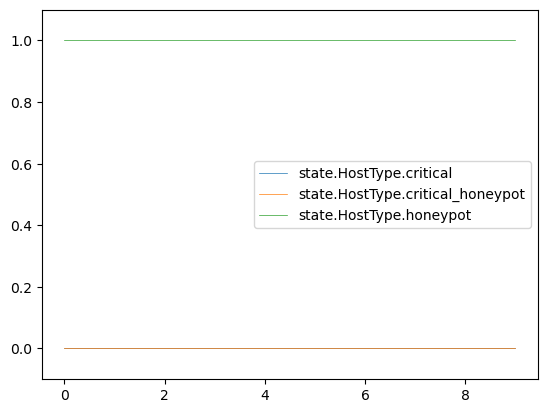

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0   EnumAccounts           LogIOCs   
1                        0.0           Exit  RestrictAccPrivs   
2                        0.0            Nop      DecoyAccount   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                          denied                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

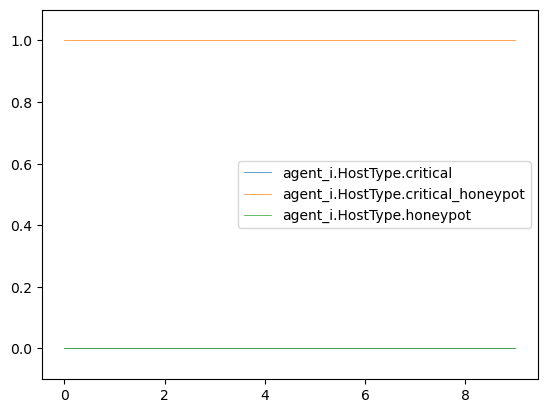

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0           LogIOCs   EnumAccounts   
1                        1.0  RestrictAccPrivs           Exit   
2                        1.0      DecoyAccount            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                   login_activity  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                             none  
9                             none

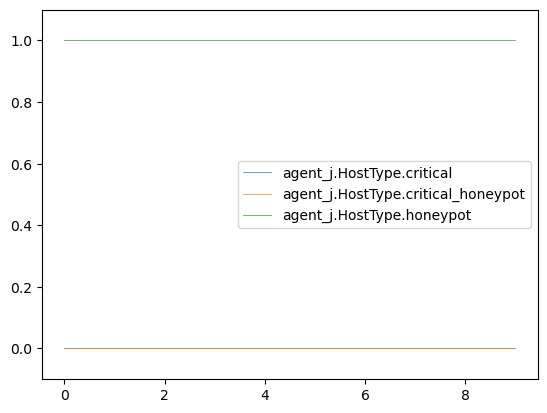

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action    agent_j.action
0                  1.0                   0.0   EnumAccounts           LogIOCs
1                  0.0                   1.0           Exit  RestrictAccPrivs
2                  0.0                   1.0            Nop      DecoyAccount
3                  0.0                   1.0            Nop               Nop
4                  0.0                   1.0            Nop               Nop
5                  0.0                   1.0            Nop               Nop
6                  0.0                   1.0            Nop               Nop
7                  0.0                   1.0            Nop               Nop
8                  0.0                   1.0            Nop               Nop
9                  0.0                   1.0            Nop               Nop

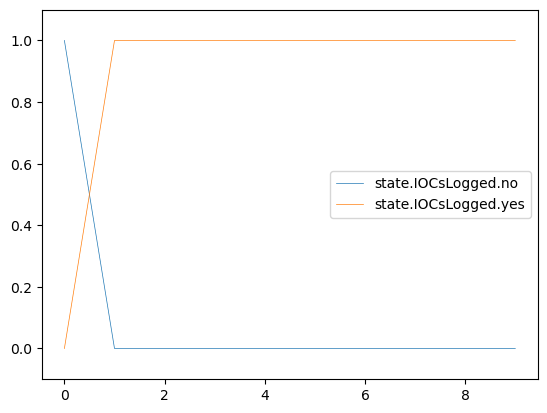

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

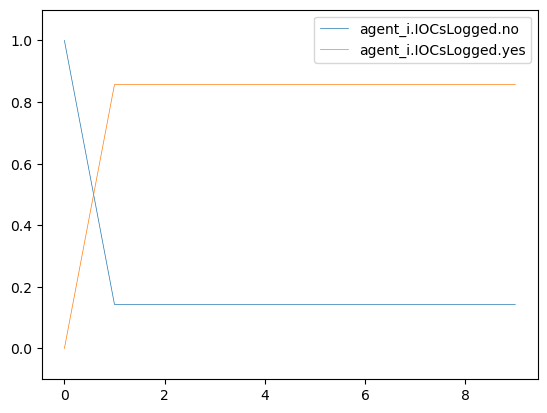

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0           LogIOCs   
1                    0.0                     1.0  RestrictAccPrivs   
2                    0.0                     1.0      DecoyAccount   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

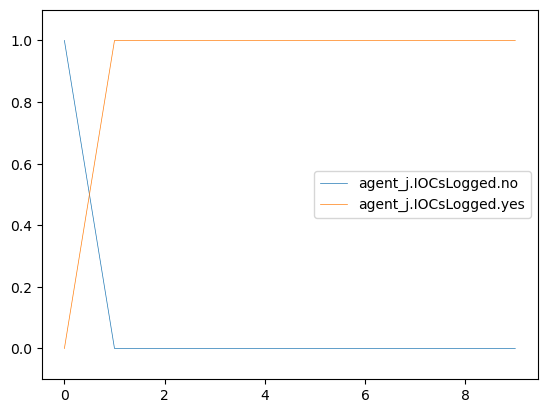

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0   EnumAccounts   
1                     0.0                     1.0           Exit   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

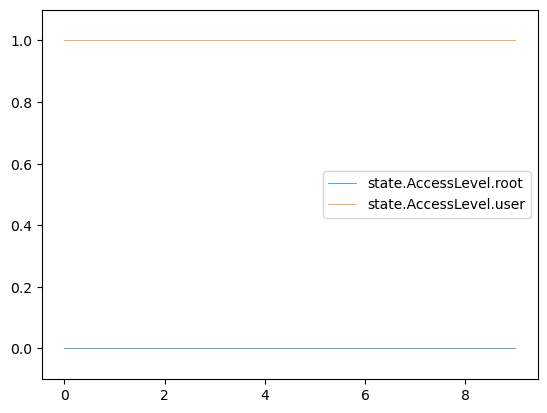

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

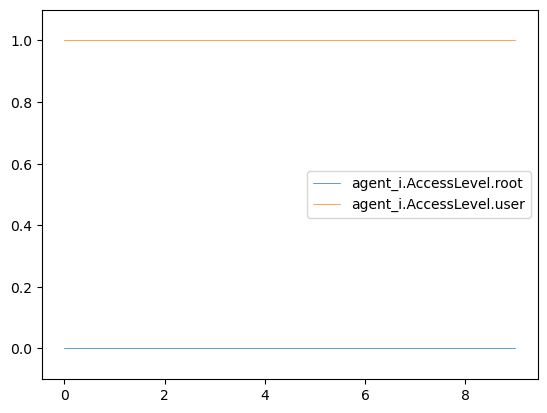

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000           LogIOCs   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000      DecoyAccount   
3                  0.000000                  1.000000               Nop   
4                  0.143059                  0.856941               Nop   
5                  0.023463                  0.976537               Nop   
6                  0.003421                  0.996579               Nop   
7                  0.003110                  0.996890               Nop   
8                  0.003110                  0.996890               Nop   
9                  0.003110                  0.996890               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

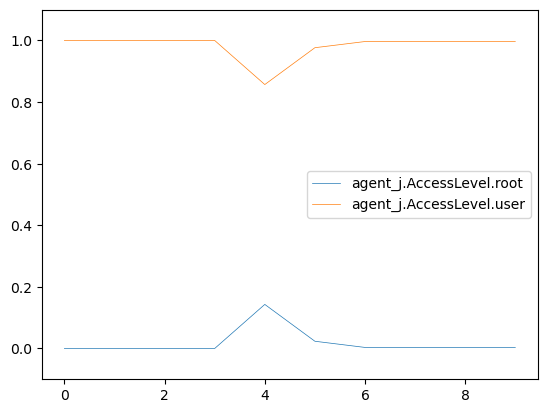

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0   EnumAccounts           LogIOCs
1                   0.0                   1.0           Exit  RestrictAccPrivs
2                   1.0                   0.0            Nop      DecoyAccount
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop               Nop
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0            Nop               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

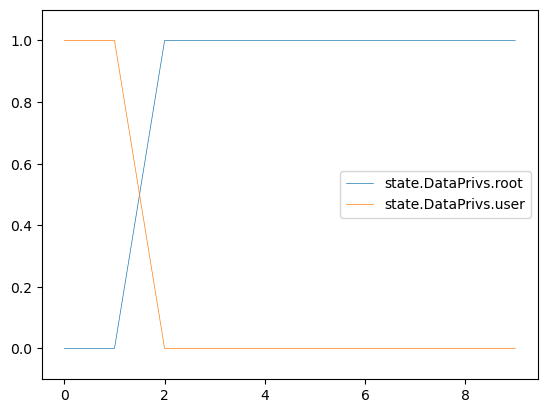

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

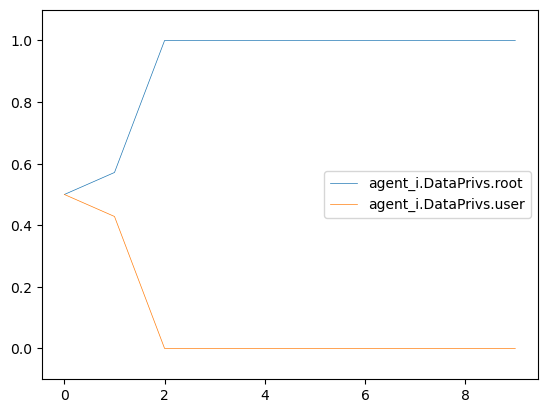

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0           LogIOCs   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0      DecoyAccount   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

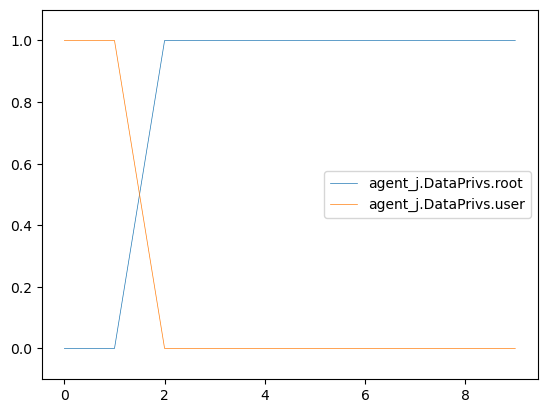

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0   EnumAccounts           LogIOCs
1                 1.0                  0.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

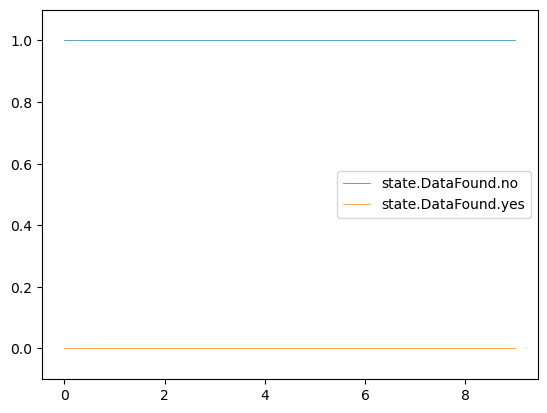

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

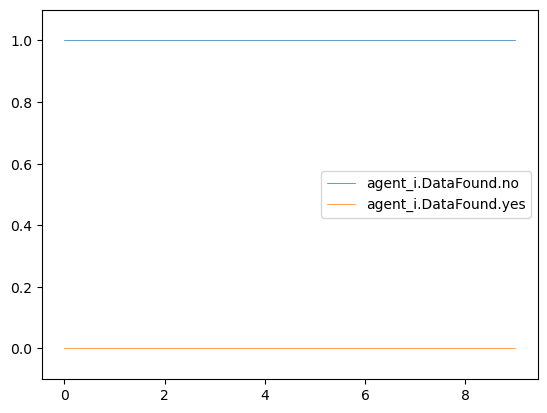

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000           LogIOCs   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000      DecoyAccount   
3              0.300031               0.699968               Nop   
4              0.620477               0.379523               Nop   
5              0.707955               0.292045               Nop   
6              0.722326               0.277674               Nop   
7              0.722546               0.277453               Nop   
8              0.722546               0.277454               Nop   
9              0.722547               0.277453               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

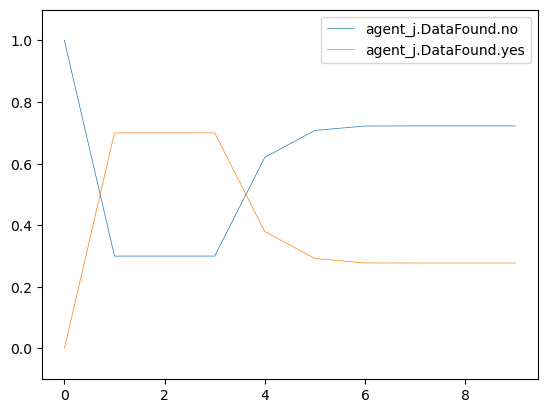

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0   EnumAccounts   
1                    1.0                     0.0           Exit   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

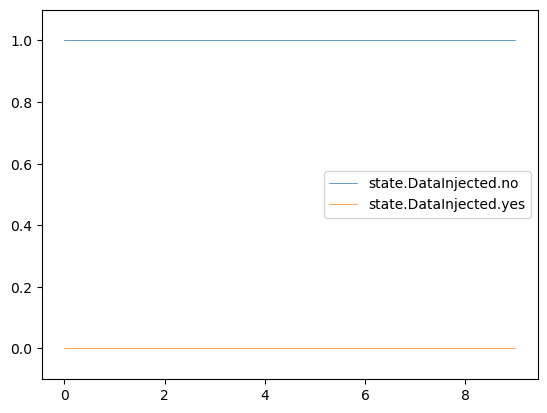

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

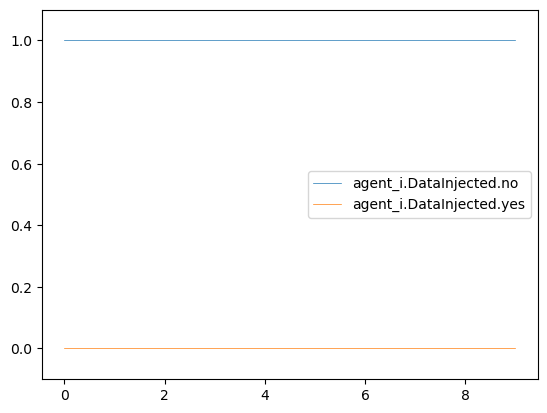

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000           LogIOCs   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000      DecoyAccount   
3                 0.370028                  0.629972               Nop   
4                 0.778201                  0.221799               Nop   
5                 0.889414                  0.110586               Nop   
6                 0.907141                  0.092859               Nop   
7                 0.907398                  0.092602               Nop   
8                 0.907397                  0.092603               Nop   
9                 0.907398                  0.092602               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

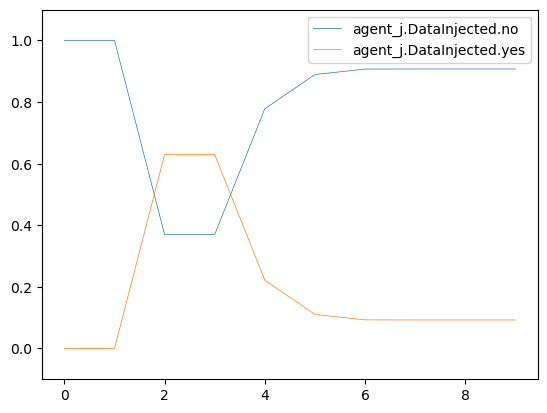

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

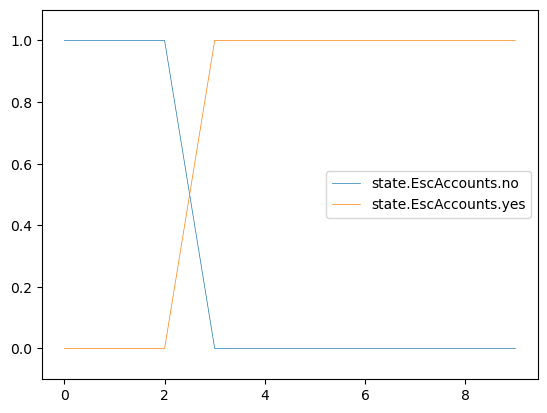

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.103687                 0.896313            Nop   
4                0.103687                 0.896313            Nop   
5                0.103687                 0.896313            Nop   
6                0.103687                 0.896313            Nop   
7                0.103687                 0.896313            Nop   
8                0.103687                 0.896313            Nop   
9                0.103687                 0.896313            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

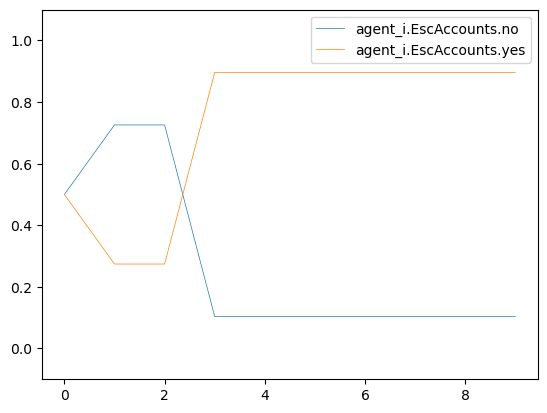

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0           LogIOCs   
1                     1.0                      0.0  RestrictAccPrivs   
2                     1.0                      0.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

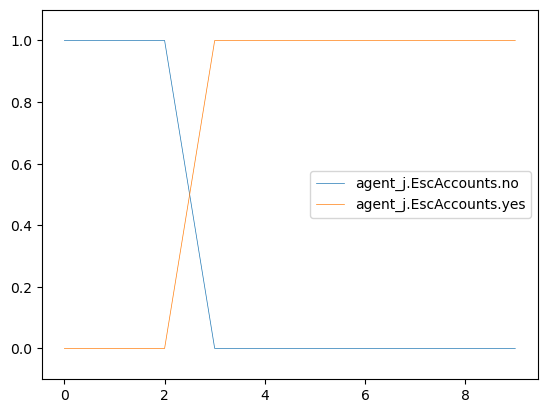

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0   EnumAccounts           LogIOCs
1                 0.0                  1.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

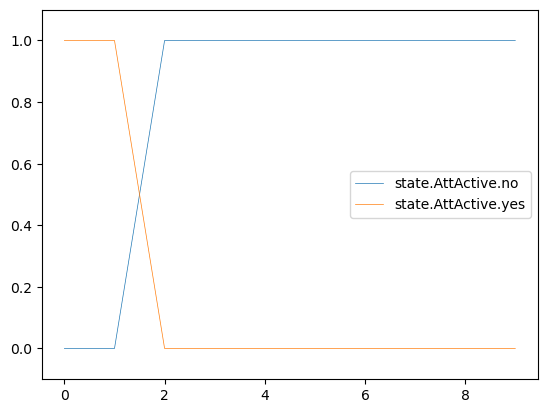

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

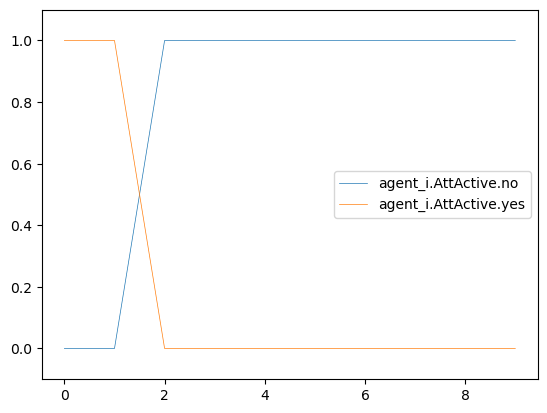

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000           1.000000e+00           LogIOCs   
1              0.000000           9.999999e-01  RestrictAccPrivs   
2              0.000000           1.000000e+00      DecoyAccount   
3              0.000052           9.999474e-01               Nop   
4              0.755909           2.440907e-01               Nop   
5              0.975323           2.467719e-02               Nop   
6              0.996579           3.420830e-03               Nop   
7              0.999948           5.190037e-05               Nop   
8              0.999995           5.436300e-06               Nop   
9              1.000000           9.268998e-09               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

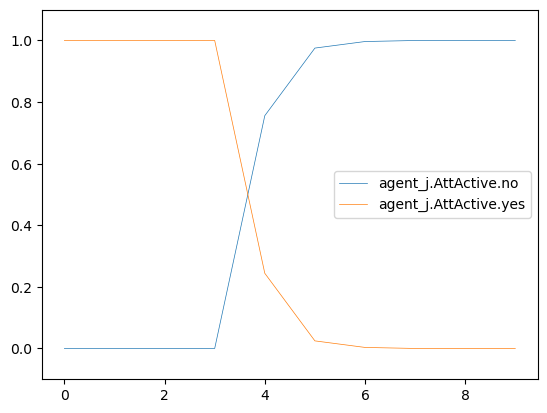

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

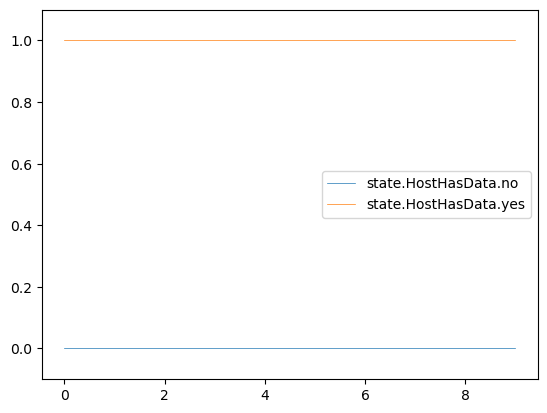

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

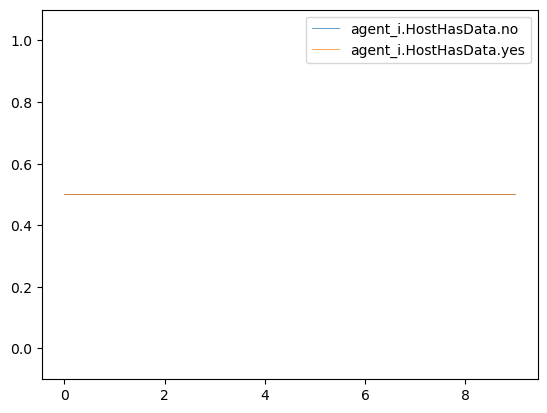

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0           LogIOCs   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                   login_activity  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                   login_activity  
8            Nop                             none  
9            Nop                             none

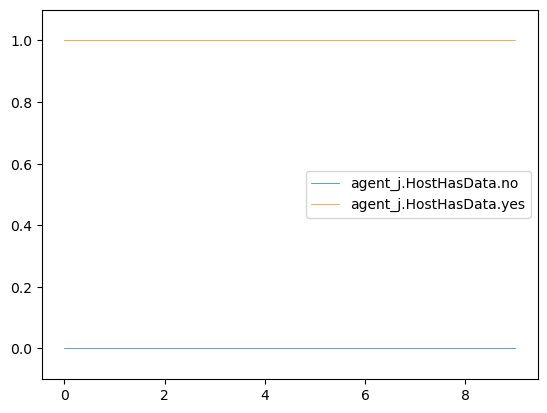

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0   EnumAccounts           LogIOCs
1                1.0                 0.0           Exit  RestrictAccPrivs
2                1.0                 0.0            Nop      DecoyAccount
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop               Nop
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0            Nop               Nop
7                1.0                 0.0            Nop               Nop
8                1.0                 0.0            Nop               Nop
9                1.0                 0.0            Nop               Nop

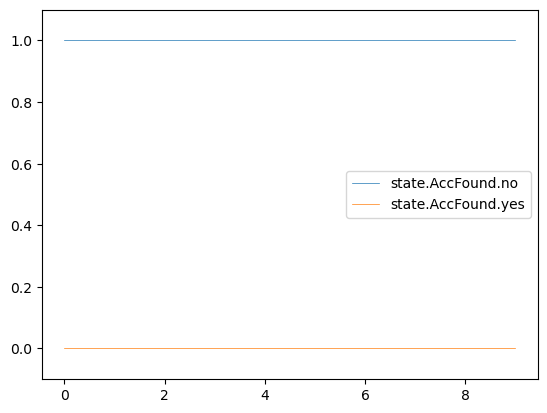

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000   EnumAccounts           LogIOCs   
1             0.943548              0.056452           Exit  RestrictAccPrivs   
2             0.943548              0.056452            Nop      DecoyAccount   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                         none   
5                            auth                   user_files   
6                          denied                         none   
7                            auth                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

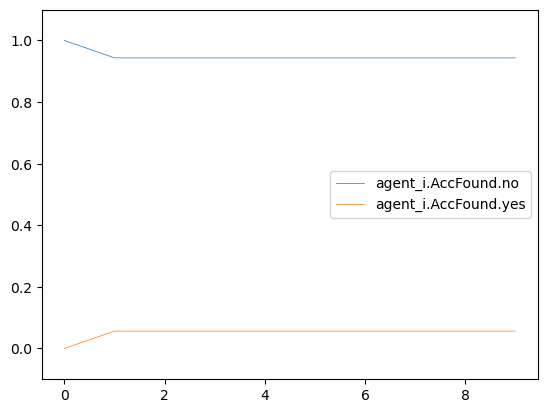

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000           LogIOCs   EnumAccounts   
1             1.000000              0.000000  RestrictAccPrivs           Exit   
2             1.000000              0.000000      DecoyAccount            Nop   
3             0.548526              0.451474               Nop            Nop   
4             0.841046              0.158954               Nop            Nop   
5             0.958306              0.041694               Nop            Nop   
6             0.977974              0.022026               Nop            Nop   
7             0.978279              0.021721               Nop            Nop   
8             0.978279              0.021721               Nop            Nop   
9             0.978279              0.021721               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                   login_activity  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                             none  
9                             none

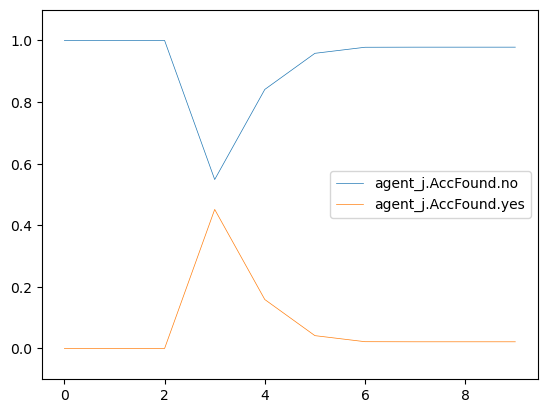

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

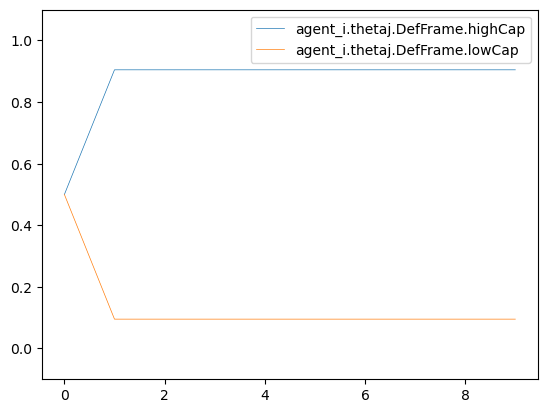

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

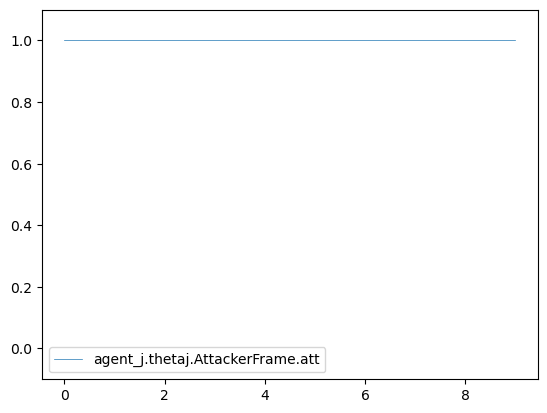

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0   EnumAccounts           LogIOCs  
1                      1.0           Exit  RestrictAccPrivs  
2                      1.0            Nop      DecoyAccount  
3                      1.0            Nop               Nop  
4                      1.0            Nop               Nop  
5                      1.0            Nop               Nop  
6                      1.0            Nop               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

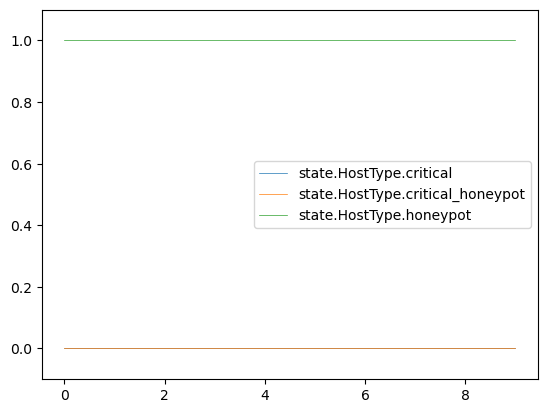

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0   EnumAccounts           LogIOCs   
1                        0.0           Exit  RestrictAccPrivs   
2                        0.0            Nop      DecoyAccount   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

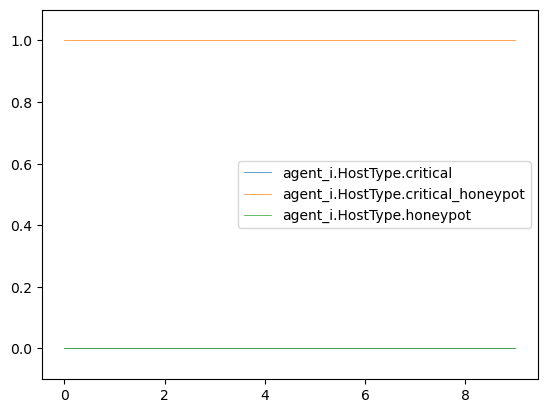

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0           LogIOCs   EnumAccounts   
1                        1.0  RestrictAccPrivs           Exit   
2                        1.0      DecoyAccount            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

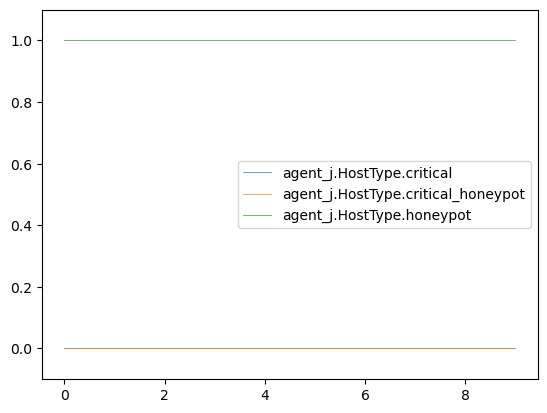

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action    agent_j.action
0                  1.0                   0.0   EnumAccounts           LogIOCs
1                  0.0                   1.0           Exit  RestrictAccPrivs
2                  0.0                   1.0            Nop      DecoyAccount
3                  0.0                   1.0            Nop               Nop
4                  0.0                   1.0            Nop               Nop
5                  0.0                   1.0            Nop               Nop
6                  0.0                   1.0            Nop               Nop
7                  0.0                   1.0            Nop               Nop
8                  0.0                   1.0            Nop               Nop
9                  0.0                   1.0            Nop               Nop

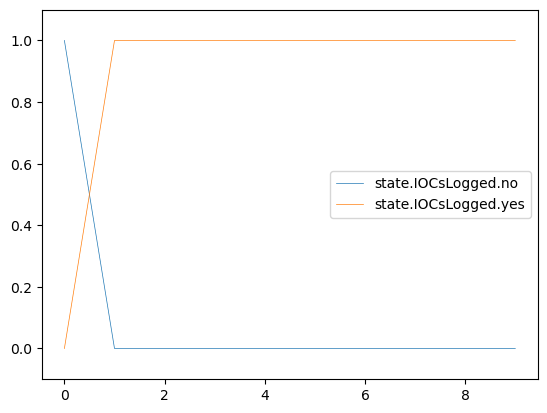

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

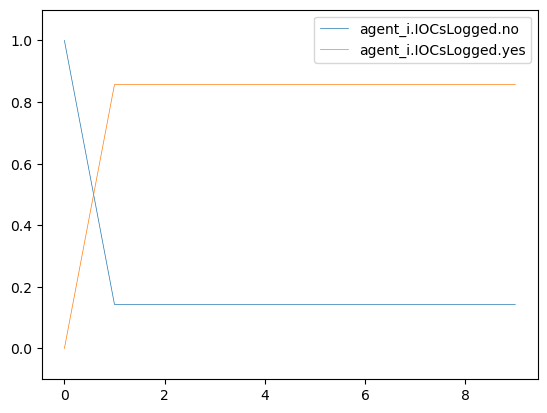

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0           LogIOCs   
1                    0.0                     1.0  RestrictAccPrivs   
2                    0.0                     1.0      DecoyAccount   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

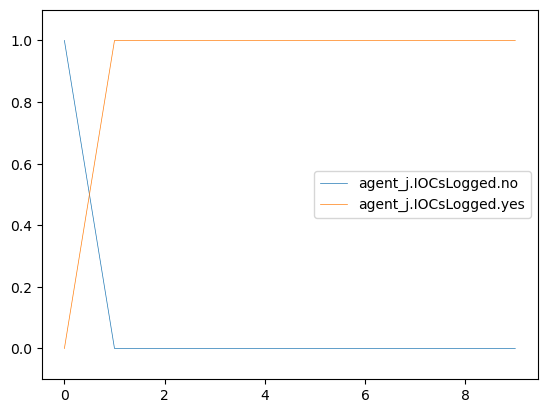

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0   EnumAccounts   
1                     0.0                     1.0           Exit   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

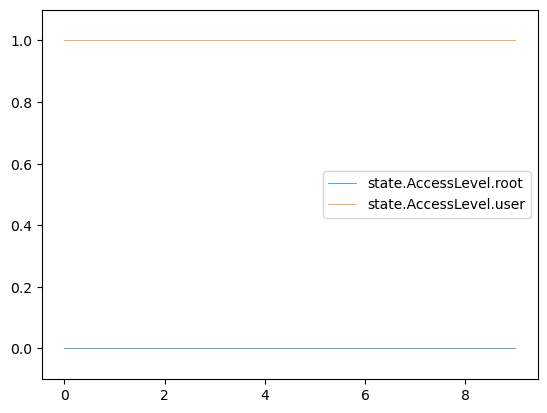

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

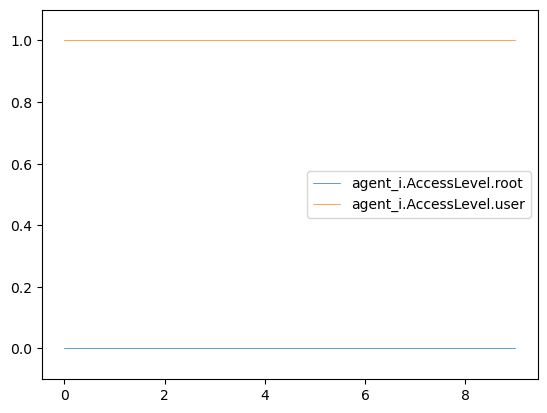

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000           LogIOCs   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000      DecoyAccount   
3                  0.000000                  1.000000               Nop   
4                  0.143059                  0.856941               Nop   
5                  0.023463                  0.976537               Nop   
6                  0.003421                  0.996579               Nop   
7                  0.003110                  0.996890               Nop   
8                  0.003106                  0.996894               Nop   
9                  0.003106                  0.996894               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

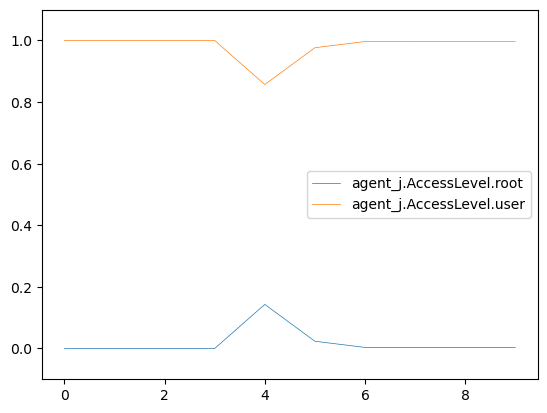

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0   EnumAccounts           LogIOCs
1                   0.0                   1.0           Exit  RestrictAccPrivs
2                   1.0                   0.0            Nop      DecoyAccount
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop               Nop
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0            Nop               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

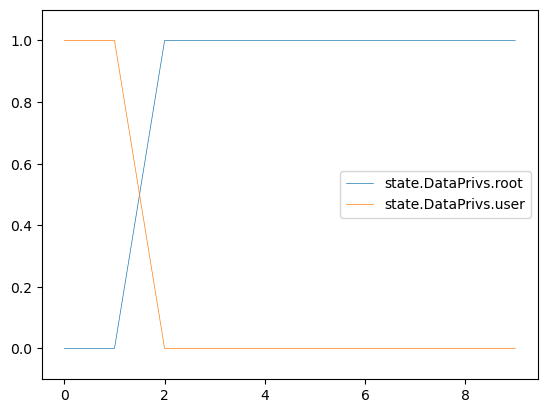

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

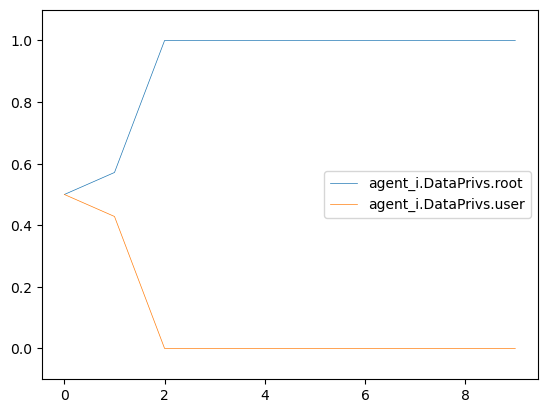

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0           LogIOCs   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0      DecoyAccount   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

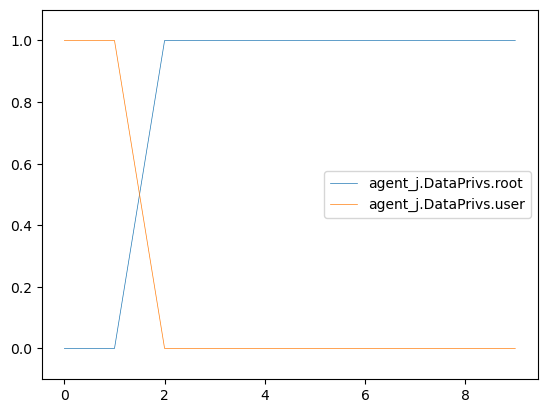

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0   EnumAccounts           LogIOCs
1                 1.0                  0.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

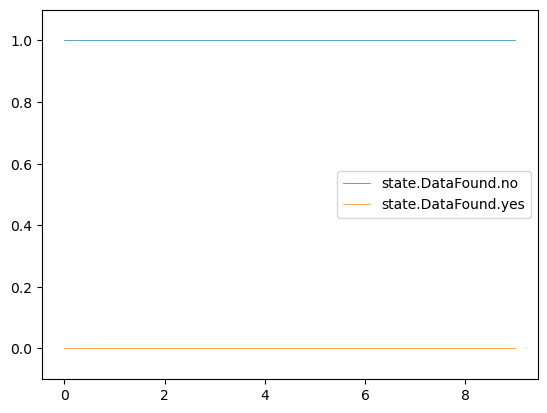

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

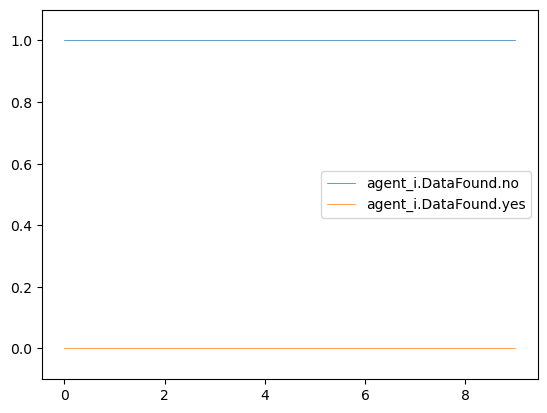

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000           LogIOCs   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000      DecoyAccount   
3              0.300031               0.699968               Nop   
4              0.620477               0.379523               Nop   
5              0.707955               0.292045               Nop   
6              0.722326               0.277674               Nop   
7              0.722546               0.277453               Nop   
8              0.722550               0.277450               Nop   
9              0.722550               0.277450               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

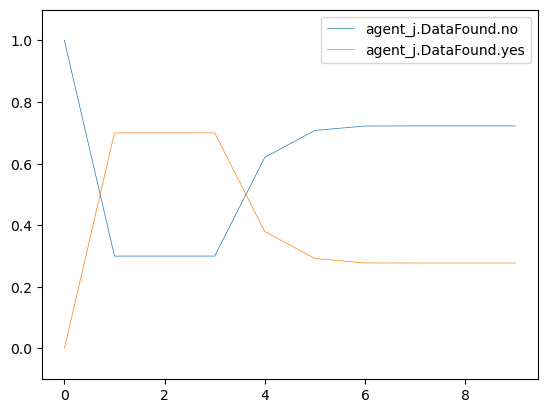

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0   EnumAccounts   
1                    1.0                     0.0           Exit   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

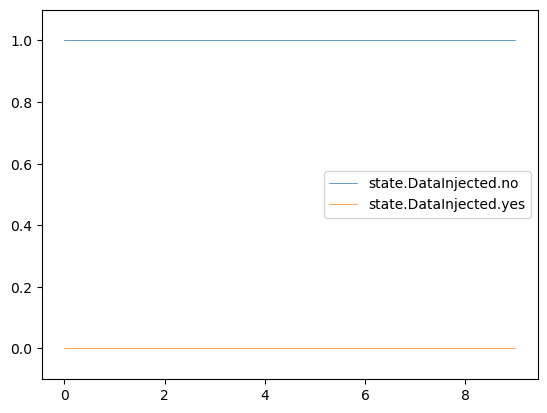

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

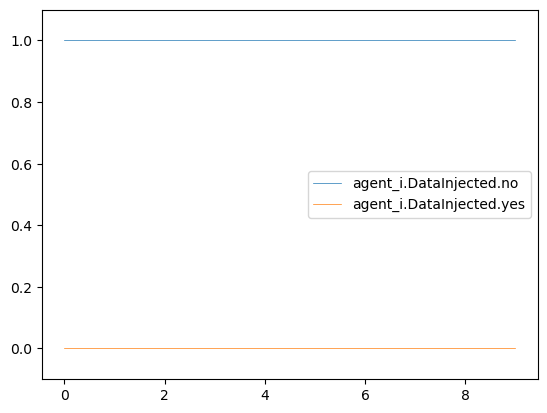

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000           LogIOCs   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000      DecoyAccount   
3                 0.370028                  0.629972               Nop   
4                 0.778201                  0.221799               Nop   
5                 0.889414                  0.110586               Nop   
6                 0.907141                  0.092859               Nop   
7                 0.907398                  0.092602               Nop   
8                 0.907402                  0.092598               Nop   
9                 0.907402                  0.092598               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

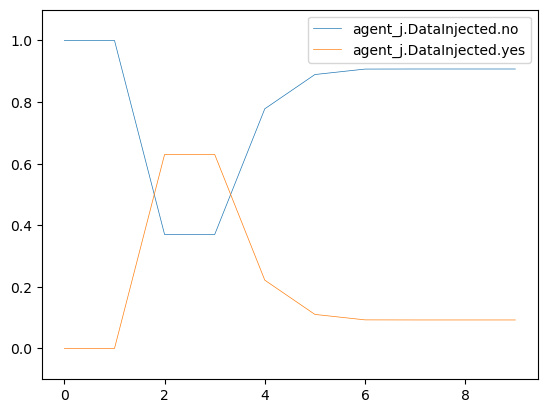

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

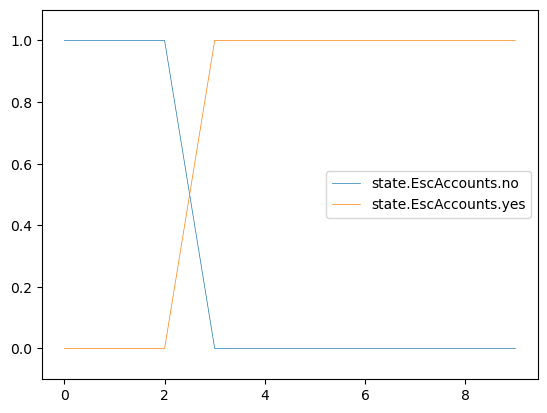

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.103687                 0.896313            Nop   
4                0.103687                 0.896313            Nop   
5                0.103687                 0.896313            Nop   
6                0.103687                 0.896313            Nop   
7                0.103687                 0.896313            Nop   
8                0.103687                 0.896313            Nop   
9                0.103687                 0.896313            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

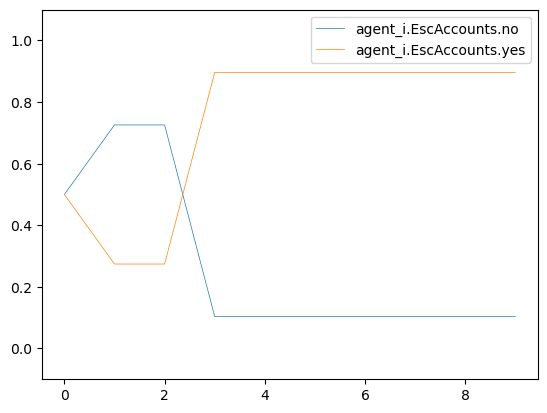

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0           LogIOCs   
1                     1.0                      0.0  RestrictAccPrivs   
2                     1.0                      0.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

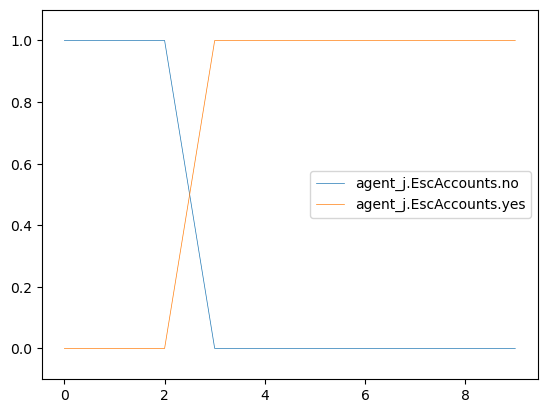

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0   EnumAccounts           LogIOCs
1                 0.0                  1.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

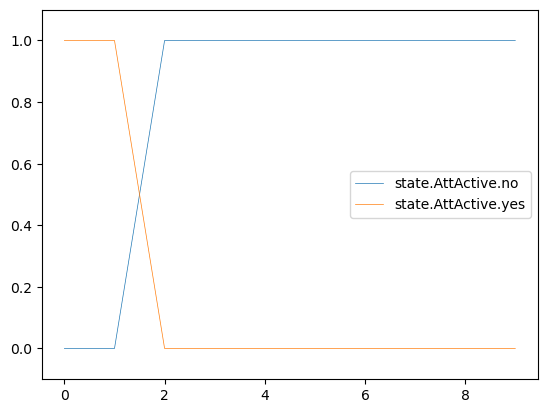

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

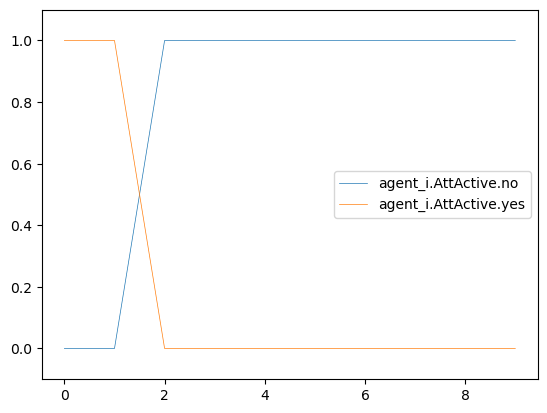

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000           1.000000e+00           LogIOCs   
1              0.000000           1.000000e+00  RestrictAccPrivs   
2              0.000000           9.999999e-01      DecoyAccount   
3              0.000052           9.999475e-01               Nop   
4              0.755909           2.440907e-01               Nop   
5              0.975323           2.467720e-02               Nop   
6              0.996579           3.420831e-03               Nop   
7              0.999948           5.190037e-05               Nop   
8              0.999999           7.766179e-07               Nop   
9              1.000000           1.324149e-09               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

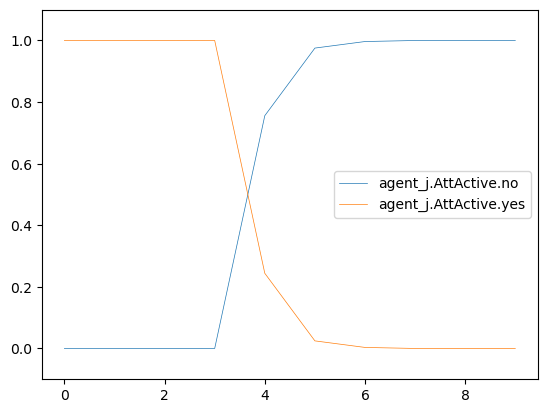

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

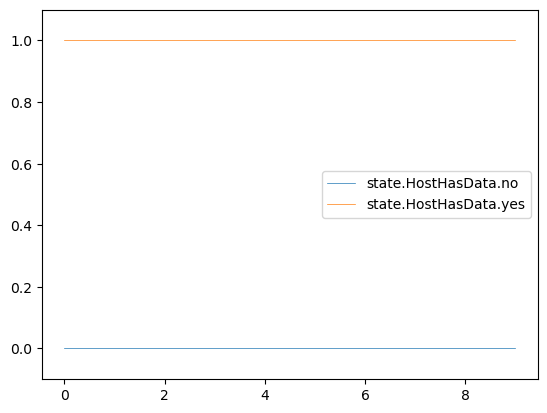

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

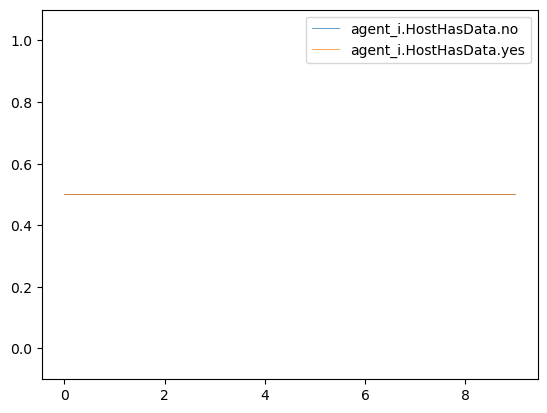

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0           LogIOCs   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

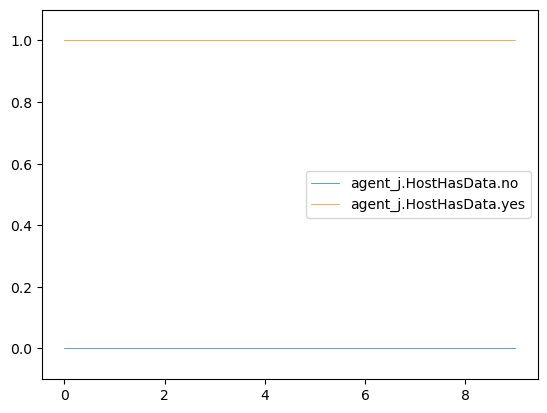

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0   EnumAccounts           LogIOCs
1                1.0                 0.0           Exit  RestrictAccPrivs
2                1.0                 0.0            Nop      DecoyAccount
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop               Nop
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0            Nop               Nop
7                1.0                 0.0            Nop               Nop
8                1.0                 0.0            Nop               Nop
9                1.0                 0.0            Nop               Nop

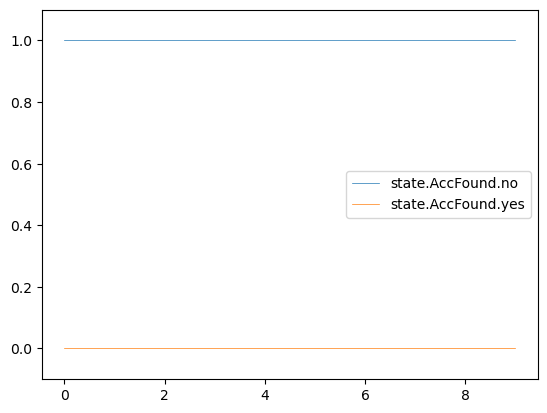

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000   EnumAccounts           LogIOCs   
1             0.943548              0.056452           Exit  RestrictAccPrivs   
2             0.943548              0.056452            Nop      DecoyAccount   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                            auth                         none   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

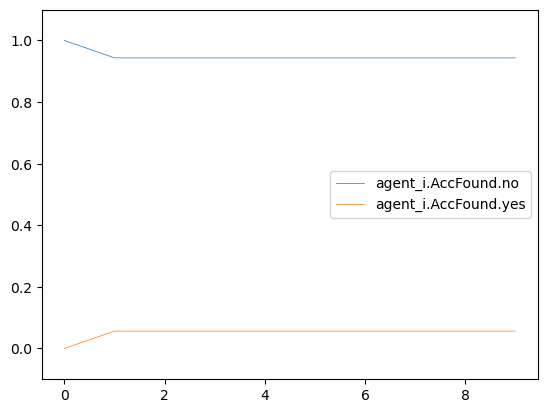

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000           LogIOCs   EnumAccounts   
1             1.000000              0.000000  RestrictAccPrivs           Exit   
2             1.000000              0.000000      DecoyAccount            Nop   
3             0.548526              0.451474               Nop            Nop   
4             0.841046              0.158954               Nop            Nop   
5             0.958306              0.041694               Nop            Nop   
6             0.977974              0.022026               Nop            Nop   
7             0.978279              0.021721               Nop            Nop   
8             0.978283              0.021716               Nop            Nop   
9             0.978283              0.021716               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

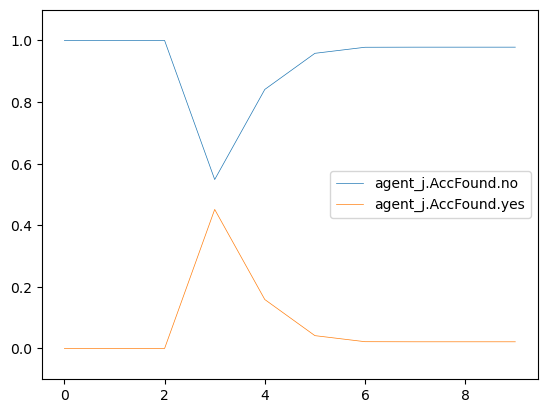

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

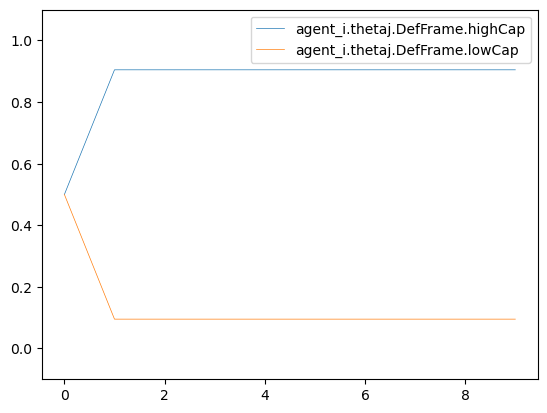

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                        file_enum
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

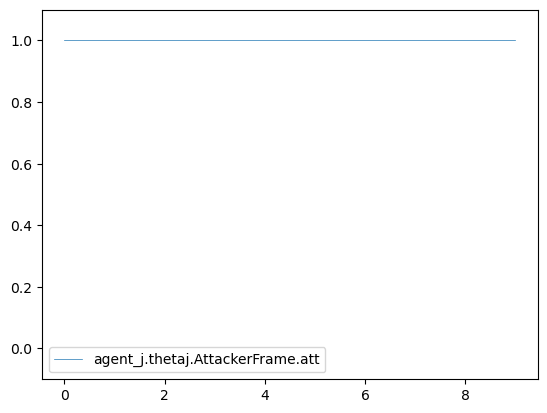

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0   EnumAccounts           LogIOCs  
1                      1.0           Exit  RestrictAccPrivs  
2                      1.0            Nop      DecoyAccount  
3                      1.0            Nop               Nop  
4                      1.0            Nop               Nop  
5                      1.0            Nop               Nop  
6                      1.0            Nop               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

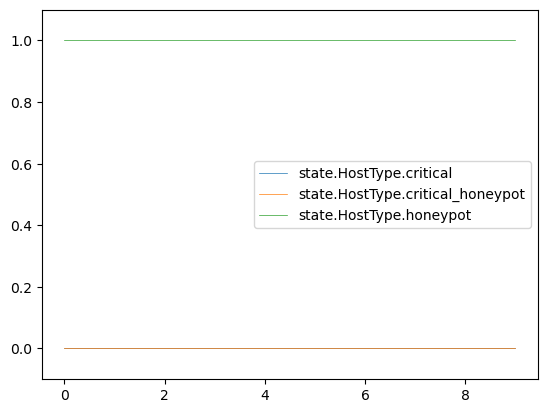

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0   EnumAccounts           LogIOCs   
1                        0.0           Exit  RestrictAccPrivs   
2                        0.0            Nop      DecoyAccount   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

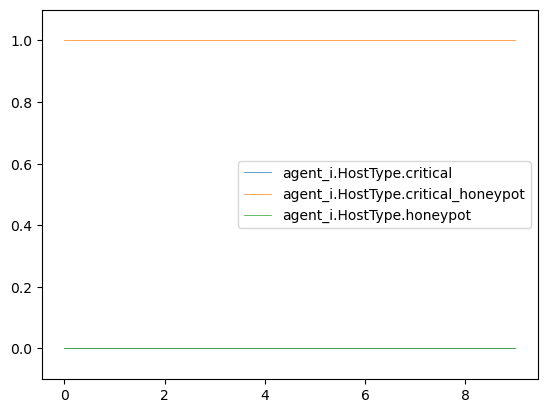

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0           LogIOCs   EnumAccounts   
1                        1.0  RestrictAccPrivs           Exit   
2                        1.0      DecoyAccount            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                             none  
2                             none  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                        file_enum  
9                             none

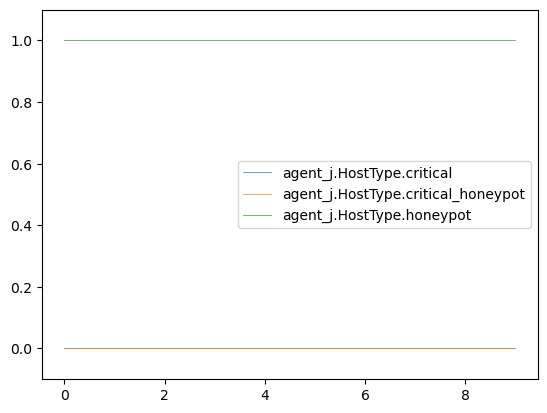

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action    agent_j.action
0                  1.0                   0.0   EnumAccounts           LogIOCs
1                  0.0                   1.0           Exit  RestrictAccPrivs
2                  0.0                   1.0            Nop      DecoyAccount
3                  0.0                   1.0            Nop               Nop
4                  0.0                   1.0            Nop               Nop
5                  0.0                   1.0            Nop               Nop
6                  0.0                   1.0            Nop               Nop
7                  0.0                   1.0            Nop               Nop
8                  0.0                   1.0            Nop               Nop
9                  0.0                   1.0            Nop               Nop

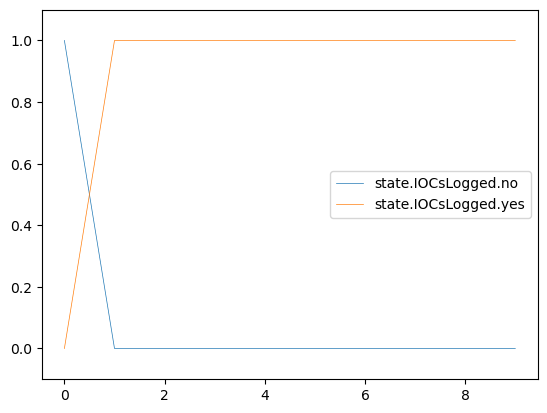

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

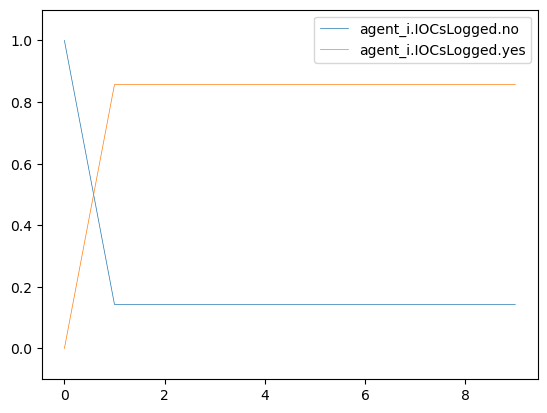

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0           LogIOCs   
1                    0.0                     1.0  RestrictAccPrivs   
2                    0.0                     1.0      DecoyAccount   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

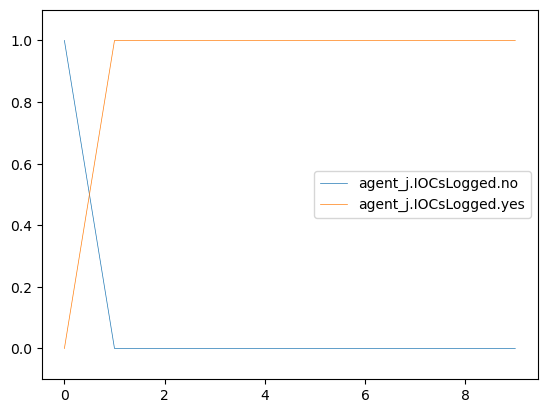

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0   EnumAccounts   
1                     0.0                     1.0           Exit   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

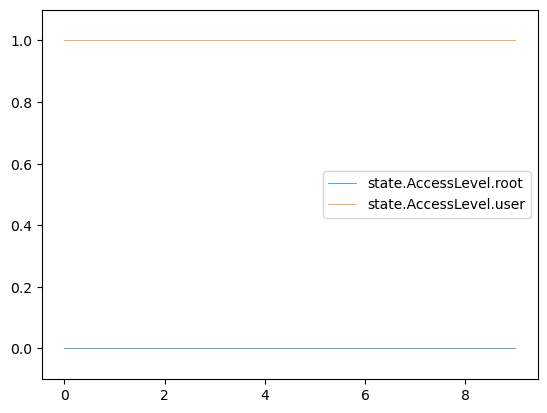

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

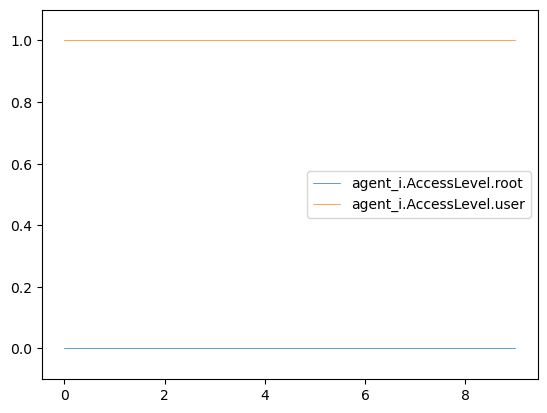

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000           LogIOCs   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000      DecoyAccount   
3                  0.000000                  1.000000               Nop   
4                  0.143059                  0.856941               Nop   
5                  0.023463                  0.976537               Nop   
6                  0.037811                  0.962189               Nop   
7                  0.023575                  0.976425               Nop   
8                  0.023377                  0.976623               Nop   
9                  0.023377                  0.976623               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

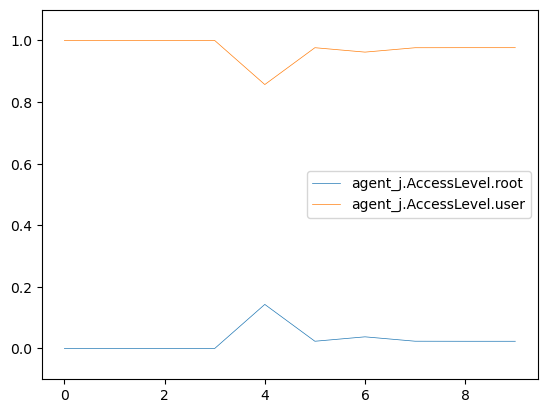

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0   EnumAccounts           LogIOCs
1                   0.0                   1.0           Exit  RestrictAccPrivs
2                   1.0                   0.0            Nop      DecoyAccount
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop               Nop
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0            Nop               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

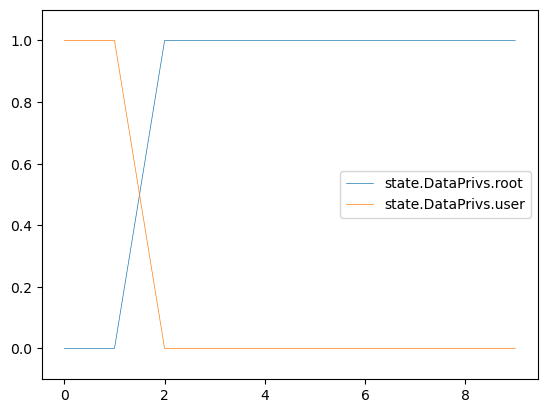

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

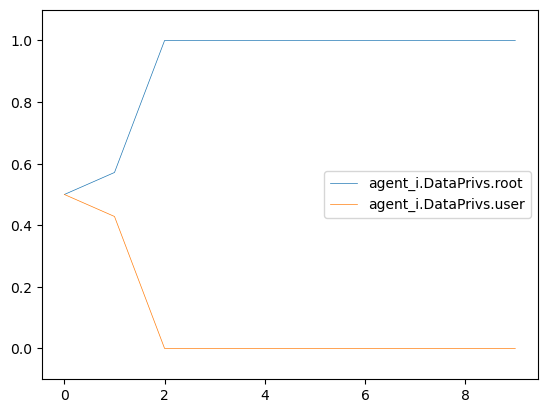

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0           LogIOCs   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0      DecoyAccount   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

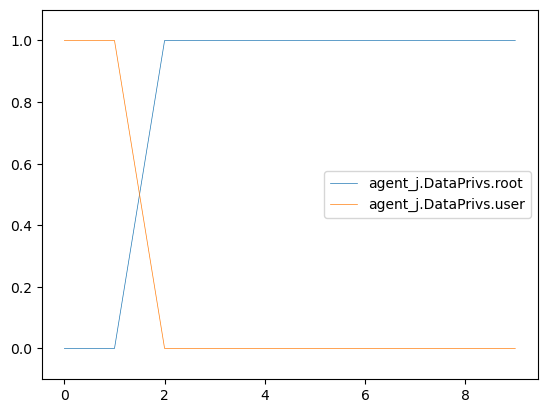

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0   EnumAccounts           LogIOCs
1                 1.0                  0.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

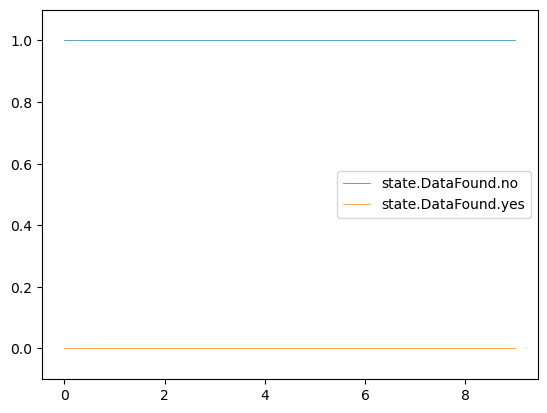

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

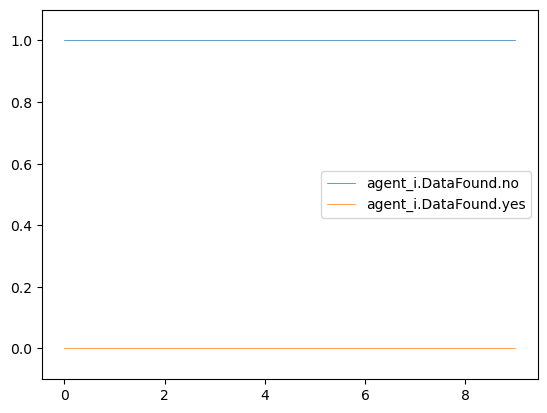

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000           LogIOCs   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000      DecoyAccount   
3              0.300031               0.699968               Nop   
4              0.620477               0.379523               Nop   
5              0.707955               0.292045               Nop   
6              0.697722               0.302278               Nop   
7              0.707882               0.292117               Nop   
8              0.708026               0.291974               Nop   
9              0.708026               0.291974               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

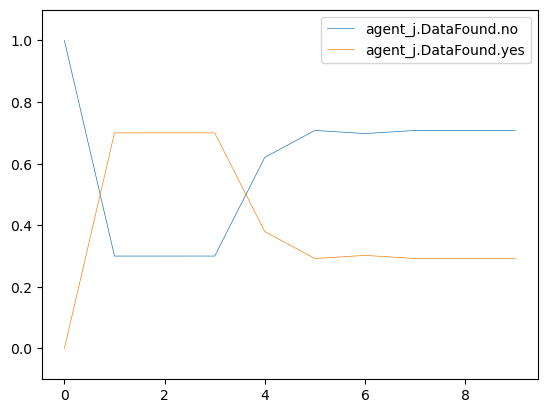

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0   EnumAccounts   
1                    1.0                     0.0           Exit   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

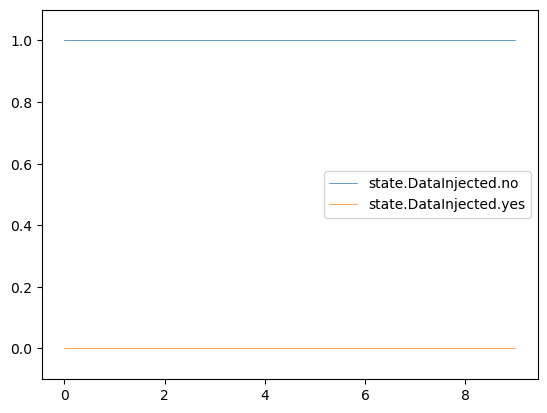

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

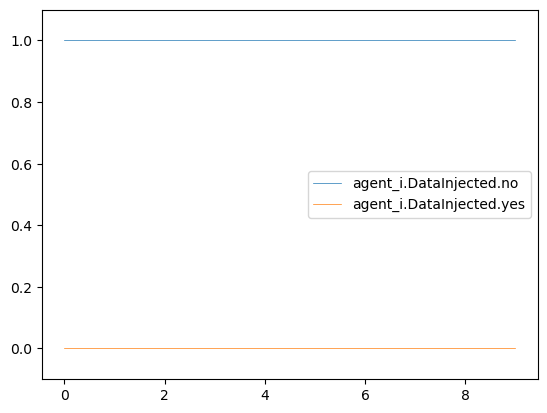

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000           LogIOCs   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000      DecoyAccount   
3                 0.370028                  0.629972               Nop   
4                 0.778201                  0.221799               Nop   
5                 0.889414                  0.110586               Nop   
6                 0.877152                  0.122848               Nop   
7                 0.888969                  0.111031               Nop   
8                 0.889122                  0.110878               Nop   
9                 0.889122                  0.110878               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

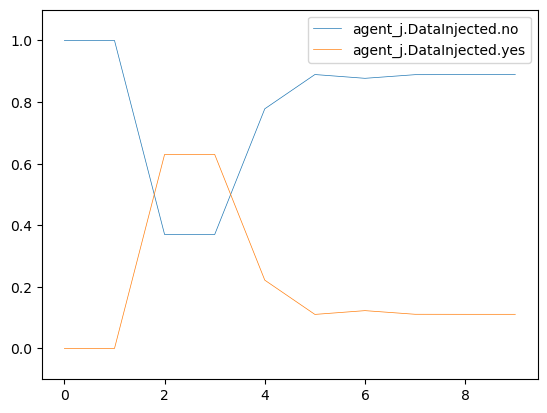

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

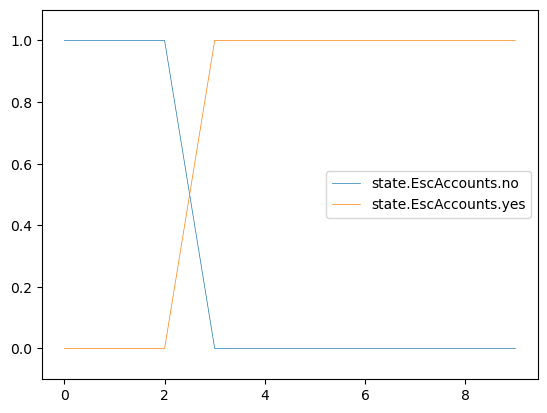

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.131579                 0.868421           Exit   
2                0.131579                 0.868421            Nop   
3                0.018797                 0.981203            Nop   
4                0.018797                 0.981203            Nop   
5                0.018797                 0.981203            Nop   
6                0.018797                 0.981203            Nop   
7                0.018797                 0.981203            Nop   
8                0.018797                 0.981203            Nop   
9                0.018797                 0.981203            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

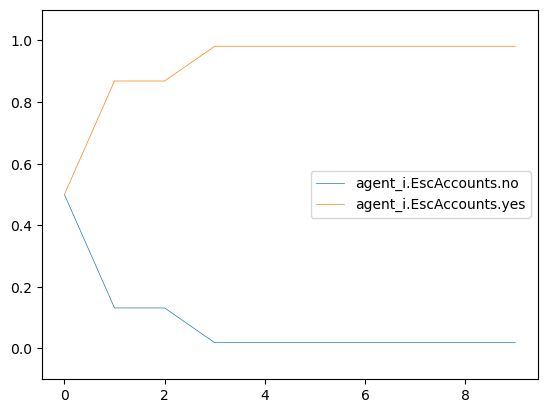

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0           LogIOCs   
1                     1.0                      0.0  RestrictAccPrivs   
2                     1.0                      0.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

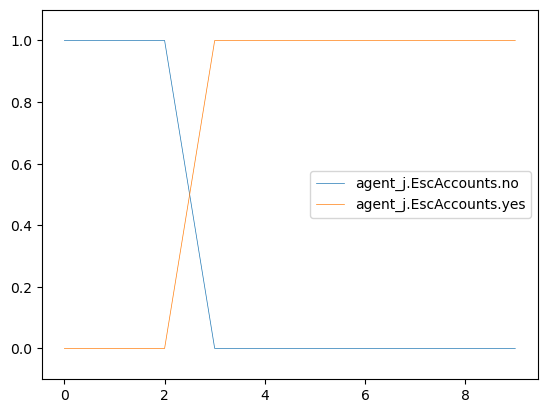

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0   EnumAccounts           LogIOCs
1                 0.0                  1.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

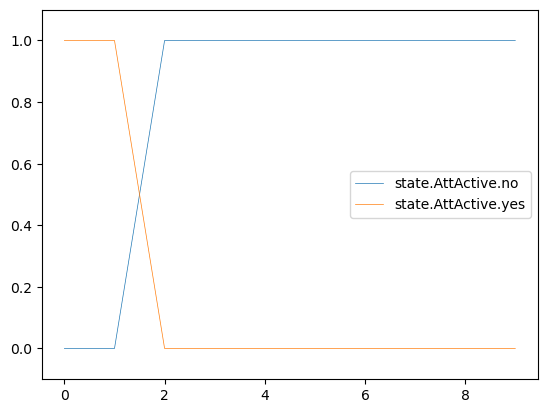

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

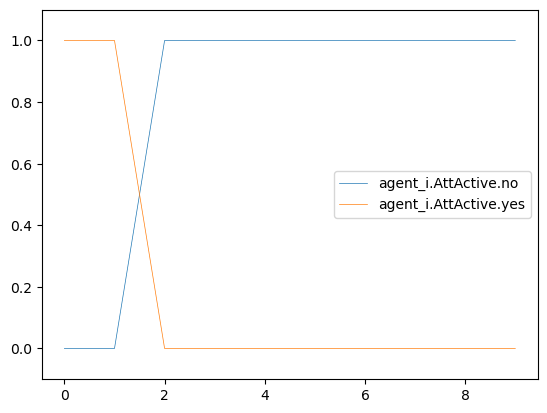

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000           1.000000e+00           LogIOCs   
1              0.000000           9.999999e-01  RestrictAccPrivs   
2              0.000000           1.000000e+00      DecoyAccount   
3              0.000052           9.999474e-01               Nop   
4              0.755909           2.440907e-01               Nop   
5              0.975323           2.467719e-02               Nop   
6              0.962187           3.781252e-02               Nop   
7              0.997534           2.465929e-03               Nop   
8              0.999966           3.386141e-05               Nop   
9              1.000000           6.356385e-08               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

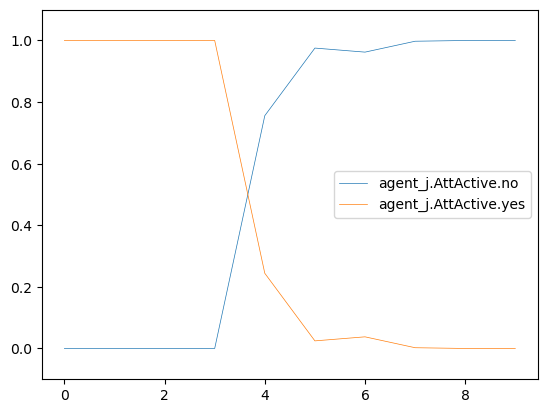

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

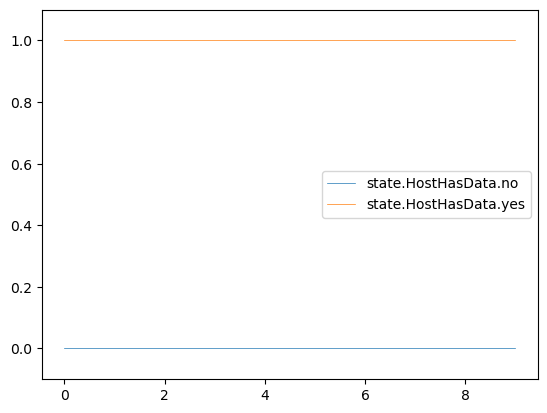

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                          denied   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

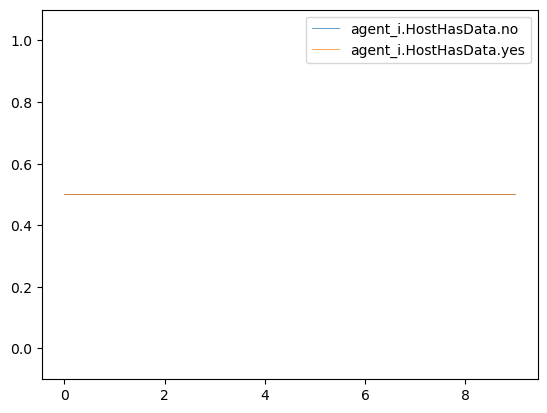

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0           LogIOCs   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                        file_enum  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

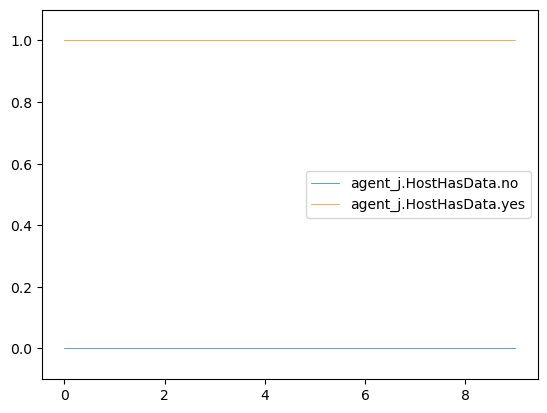

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0   EnumAccounts           LogIOCs
1                1.0                 0.0           Exit  RestrictAccPrivs
2                1.0                 0.0            Nop      DecoyAccount
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop               Nop
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0            Nop               Nop
7                1.0                 0.0            Nop               Nop
8                1.0                 0.0            Nop               Nop
9                1.0                 0.0            Nop               Nop

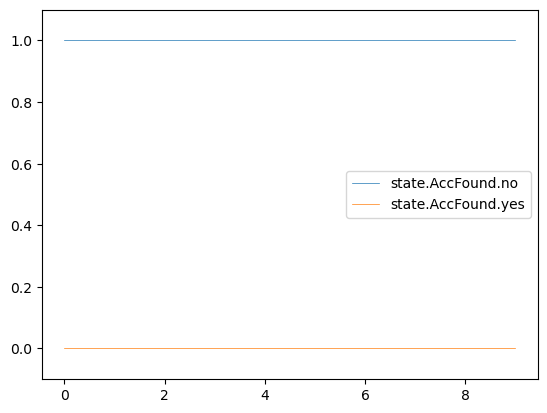

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000   EnumAccounts           LogIOCs   
1             0.171053              0.828947           Exit  RestrictAccPrivs   
2             0.171053              0.828947            Nop      DecoyAccount   
3             0.171053              0.828947            Nop               Nop   
4             0.171053              0.828947            Nop               Nop   
5             0.171053              0.828947            Nop               Nop   
6             0.171053              0.828947            Nop               Nop   
7             0.171053              0.828947            Nop               Nop   
8             0.171053              0.828947            Nop               Nop   
9             0.171053              0.828947            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                            auth                   user_files   
6                            auth                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                          denied                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           success                      terminated   
9                           success                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

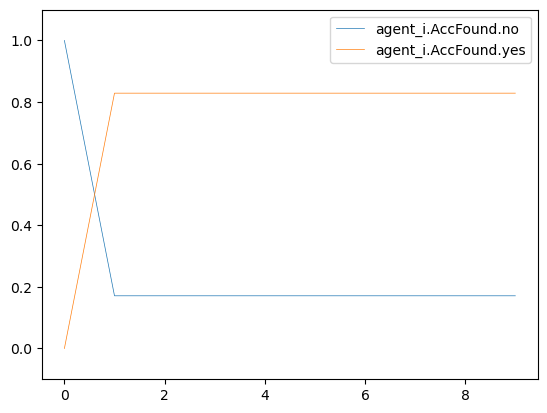

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000           LogIOCs   EnumAccounts   
1             1.000000              0.000000  RestrictAccPrivs           Exit   
2             1.000000              0.000000      DecoyAccount            Nop   
3             0.548526              0.451474               Nop            Nop   
4             0.841046              0.158954               Nop            Nop   
5             0.958306              0.041694               Nop            Nop   
6             0.944226              0.055774               Nop            Nop   
7             0.958196              0.041804               Nop            Nop   
8             0.958391              0.041609               Nop            Nop   
9             0.958391              0.041609               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                             none  
2                             none  
3                             none  
4                             none  
5                        file_enum  
6                             none  
7                             none  
8                        file_enum  
9                             none

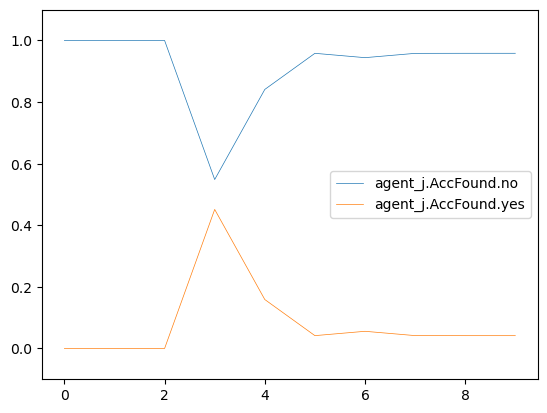

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                   user_files   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

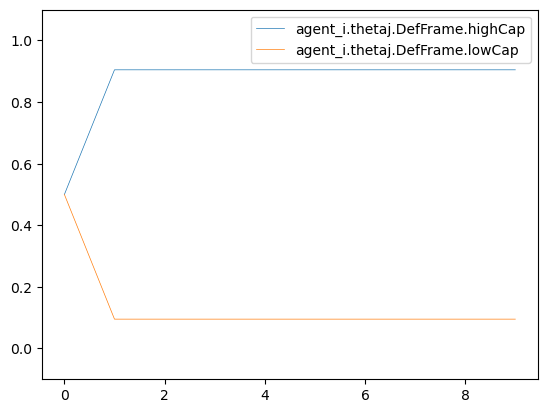

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                             none
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

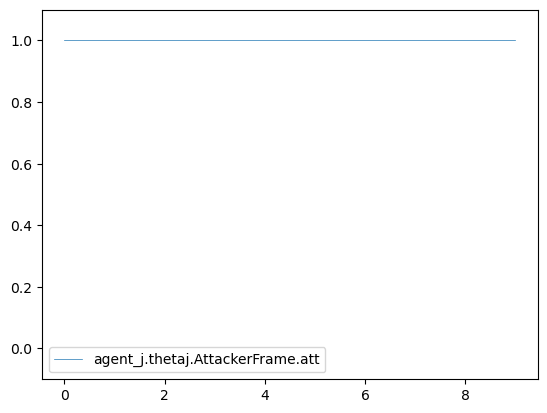

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0   EnumAccounts           LogIOCs  
1                      1.0           Exit  RestrictAccPrivs  
2                      1.0            Nop      DecoyAccount  
3                      1.0            Nop               Nop  
4                      1.0            Nop               Nop  
5                      1.0            Nop               Nop  
6                      1.0            Nop               Nop  
7                      1.0            Nop               Nop  
8                      1.0            Nop               Nop  
9                      1.0            Nop               Nop

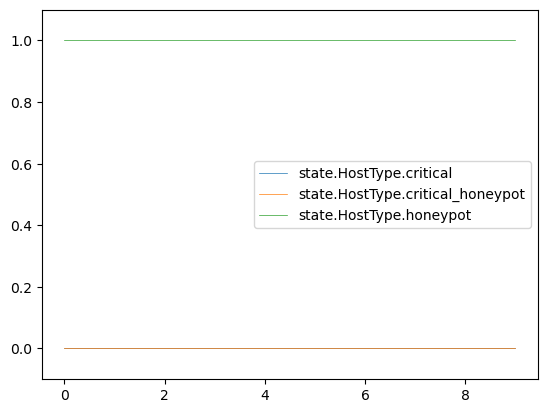

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0   EnumAccounts           LogIOCs   
1                        0.0           Exit  RestrictAccPrivs   
2                        0.0            Nop      DecoyAccount   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                   user_files   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

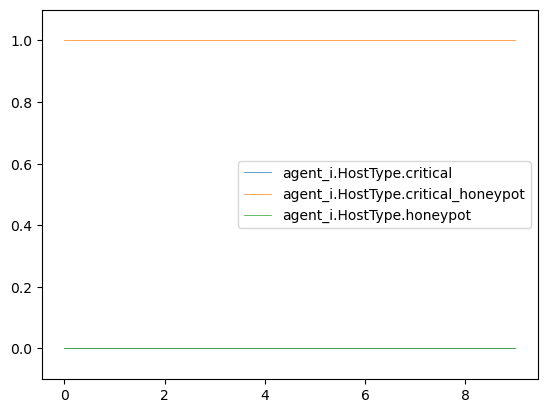

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0           LogIOCs   EnumAccounts   
1                        1.0  RestrictAccPrivs           Exit   
2                        1.0      DecoyAccount            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

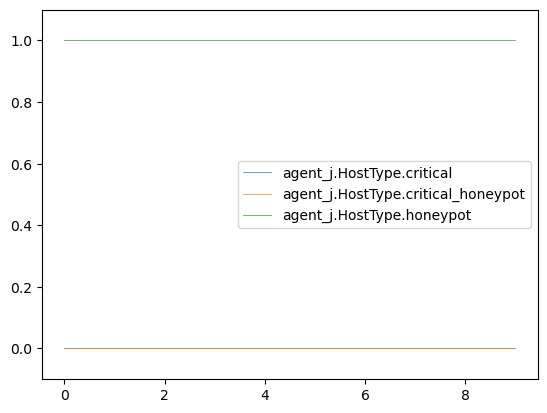

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action    agent_j.action
0                  1.0                   0.0   EnumAccounts           LogIOCs
1                  0.0                   1.0           Exit  RestrictAccPrivs
2                  0.0                   1.0            Nop      DecoyAccount
3                  0.0                   1.0            Nop               Nop
4                  0.0                   1.0            Nop               Nop
5                  0.0                   1.0            Nop               Nop
6                  0.0                   1.0            Nop               Nop
7                  0.0                   1.0            Nop               Nop
8                  0.0                   1.0            Nop               Nop
9                  0.0                   1.0            Nop               Nop

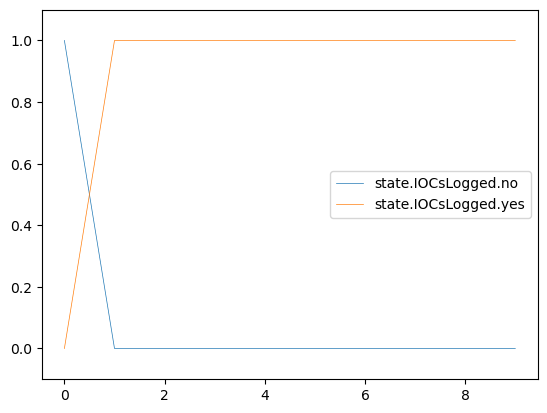

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

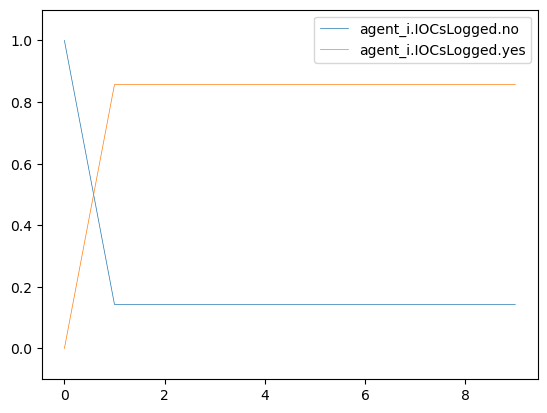

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0           LogIOCs   
1                    0.0                     1.0  RestrictAccPrivs   
2                    0.0                     1.0      DecoyAccount   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

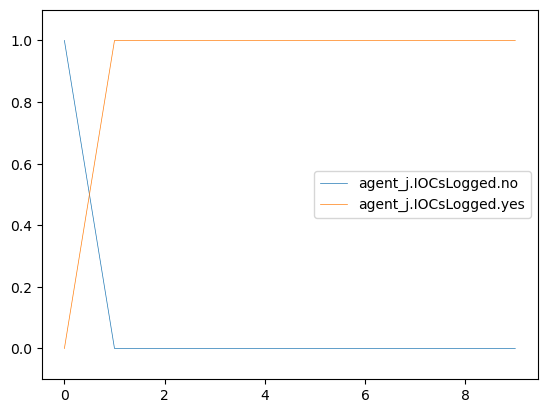

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0   EnumAccounts   
1                     0.0                     1.0           Exit   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

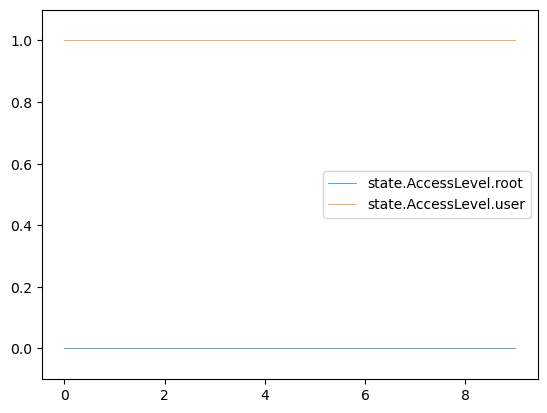

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

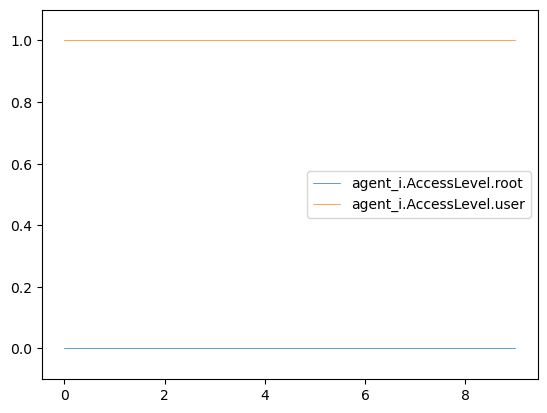

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000           LogIOCs   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000      DecoyAccount   
3                  0.000000                  1.000000               Nop   
4                  0.025380                  0.974620               Nop   
5                  0.025283                  0.974717               Nop   
6                  0.003692                  0.996308               Nop   
7                  0.003357                  0.996643               Nop   
8                  0.003352                  0.996648               Nop   
9                  0.003352                  0.996648               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

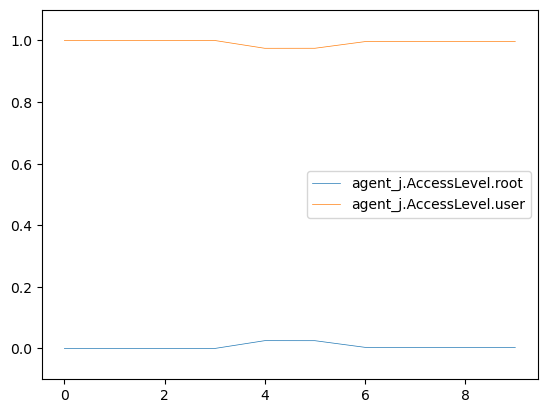

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0   EnumAccounts           LogIOCs
1                   0.0                   1.0           Exit  RestrictAccPrivs
2                   1.0                   0.0            Nop      DecoyAccount
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop               Nop
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0            Nop               Nop
7                   1.0                   0.0            Nop               Nop
8                   1.0                   0.0            Nop               Nop
9                   1.0                   0.0            Nop               Nop

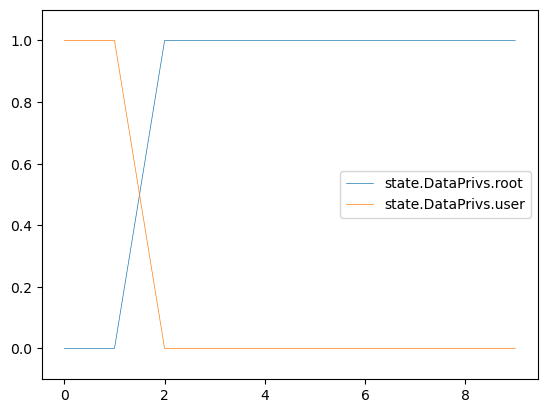

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

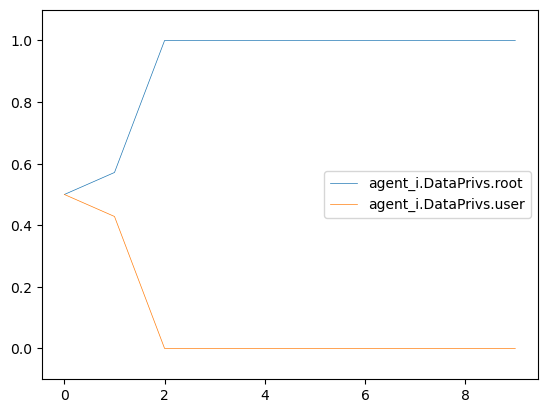

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0           LogIOCs   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0      DecoyAccount   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

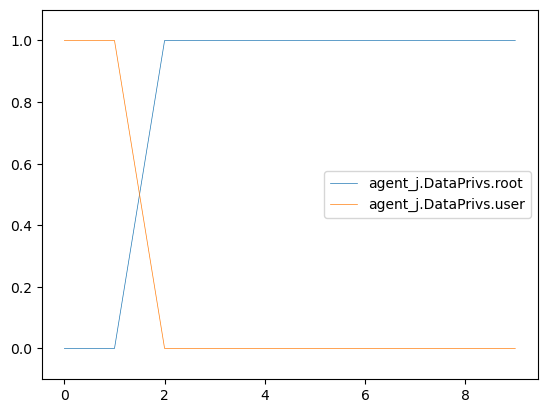

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0   EnumAccounts           LogIOCs
1                 1.0                  0.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

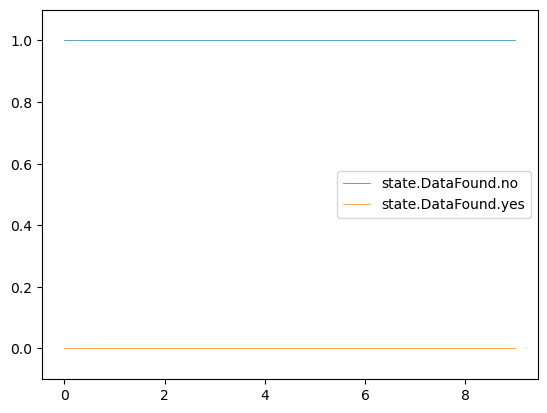

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

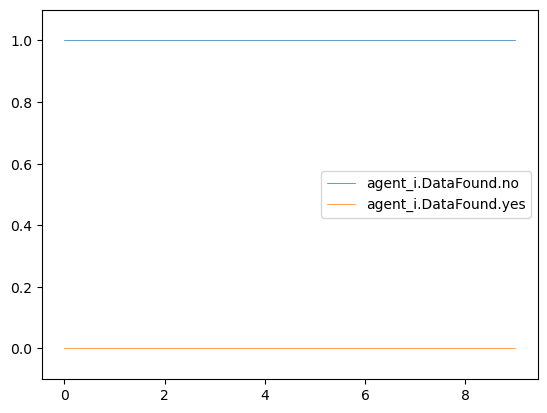

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000           LogIOCs   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.642173               0.357827      DecoyAccount   
3              0.642178               0.357822               Nop   
4              0.764782               0.235218               Nop   
5              0.765269               0.234731               Nop   
6              0.782049               0.217951               Nop   
7              0.782307               0.217693               Nop   
8              0.782311               0.217689               Nop   
9              0.782311               0.217689               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

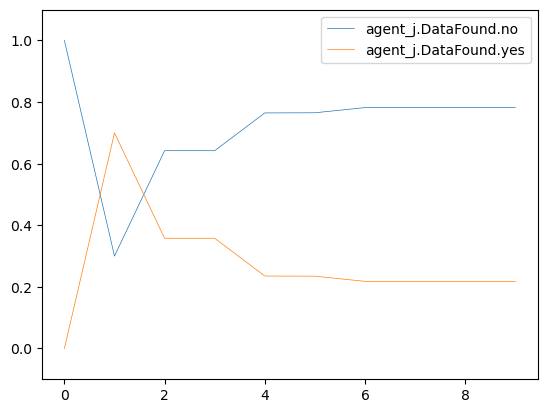

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0   EnumAccounts   
1                    1.0                     0.0           Exit   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    1.0                     0.0            Nop   
8                    1.0                     0.0            Nop   
9                    1.0                     0.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

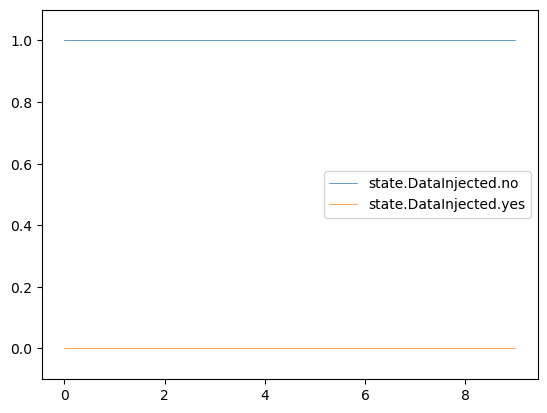

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

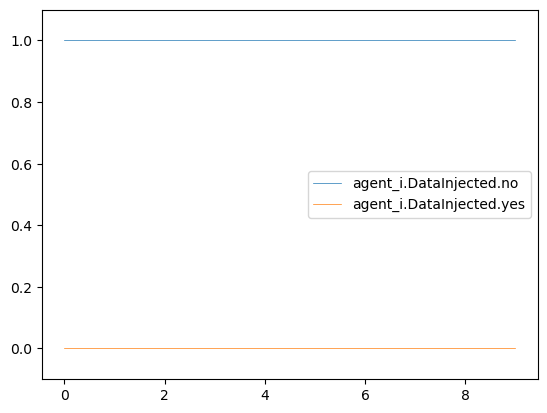

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000           LogIOCs   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.798722                  0.201278      DecoyAccount   
3                 0.798725                  0.201275               Nop   
4                 0.960651                  0.039349               Nop   
5                 0.960801                  0.039198               Nop   
6                 0.981515                  0.018485               Nop   
7                 0.981818                  0.018182               Nop   
8                 0.981822                  0.018178               Nop   
9                 0.981822                  0.018178               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

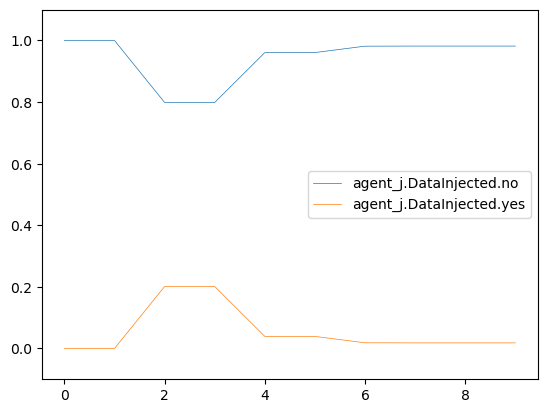

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

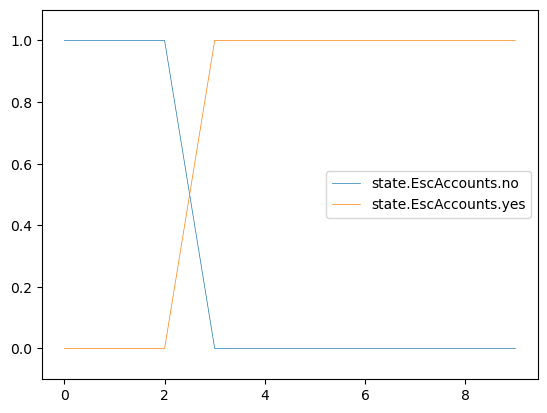

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.103687                 0.896313            Nop   
4                0.103687                 0.896313            Nop   
5                0.103687                 0.896313            Nop   
6                0.103687                 0.896313            Nop   
7                0.103687                 0.896313            Nop   
8                0.103687                 0.896313            Nop   
9                0.103687                 0.896313            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

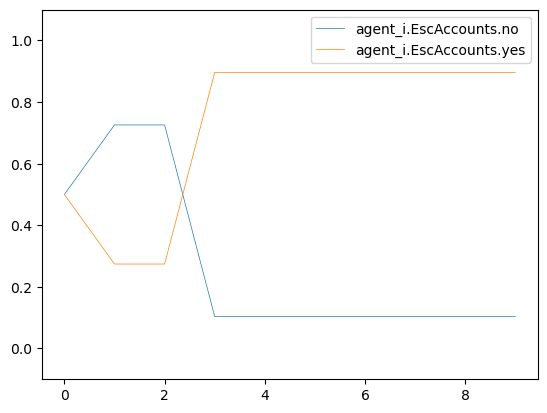

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0           LogIOCs   
1                     1.0                      0.0  RestrictAccPrivs   
2                     1.0                      0.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

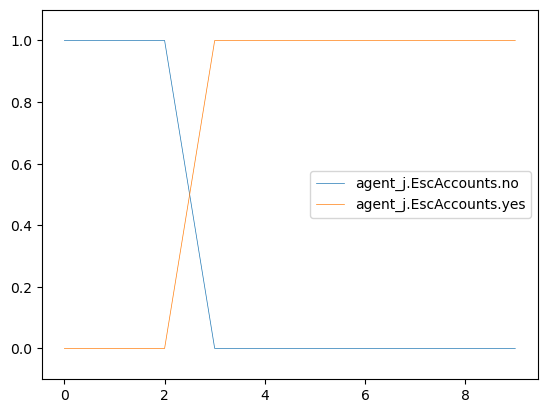

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0   EnumAccounts           LogIOCs
1                 0.0                  1.0           Exit  RestrictAccPrivs
2                 1.0                  0.0            Nop      DecoyAccount
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0            Nop               Nop
7                 1.0                  0.0            Nop               Nop
8                 1.0                  0.0            Nop               Nop
9                 1.0                  0.0            Nop               Nop

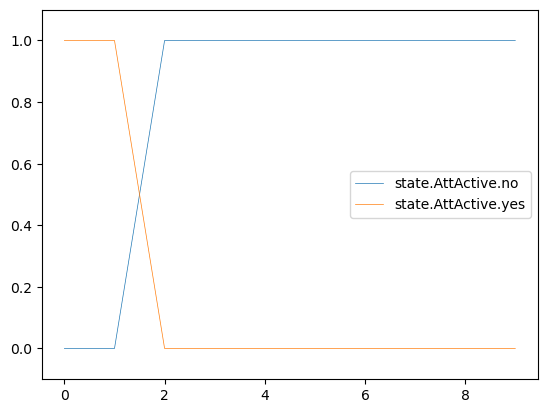

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

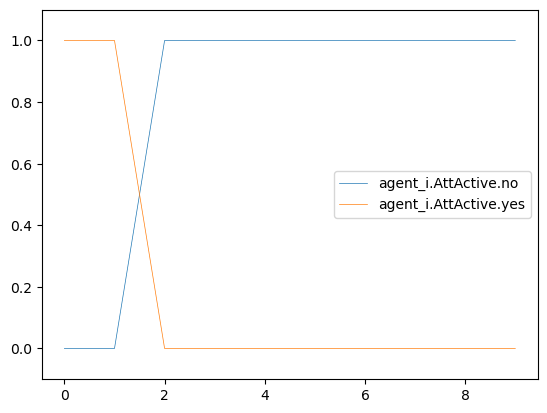

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000           1.000000e+00           LogIOCs   
1              0.000000           9.999999e-01  RestrictAccPrivs   
2              0.000000           1.000000e+00      DecoyAccount   
3              0.000017           9.999833e-01               Nop   
4              0.938587           6.141311e-02               Nop   
5              0.969058           3.094209e-02               Nop   
6              0.996308           3.692022e-03               Nop   
7              0.999944           5.601624e-05               Nop   
8              0.999999           8.382069e-07               Nop   
9              1.000000           1.429159e-09               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

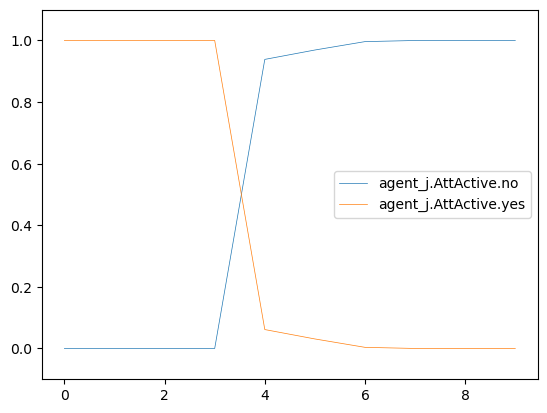

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0            Nop   
7                   0.0                    1.0            Nop   
8                   0.0                    1.0            Nop   
9                   0.0                    1.0            Nop   

     agent_j.action  
0           LogIOCs  
1  RestrictAccPrivs  
2      DecoyAccount  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

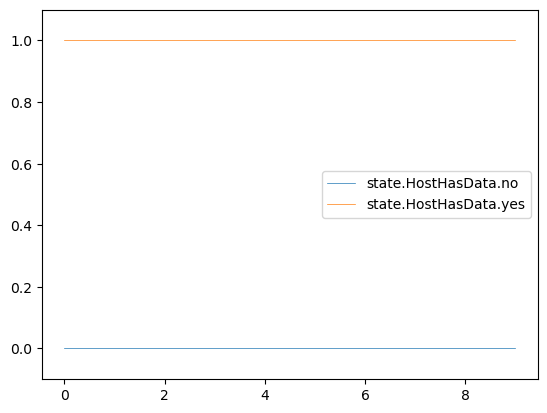

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_j.action agent_i.observation.AccessPerm'  \
0           LogIOCs                          denied   
1  RestrictAccPrivs                            auth   
2      DecoyAccount                          denied   
3               Nop                          denied   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           failure   
3                   user_files                           success   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

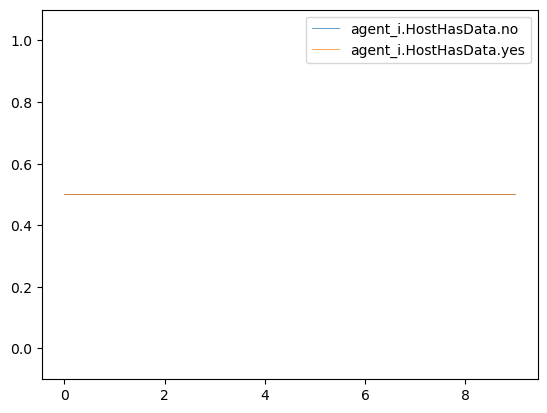

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0           LogIOCs   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0      DecoyAccount   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1           Exit                        file_enum  
2            Nop                             none  
3            Nop                             none  
4            Nop                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

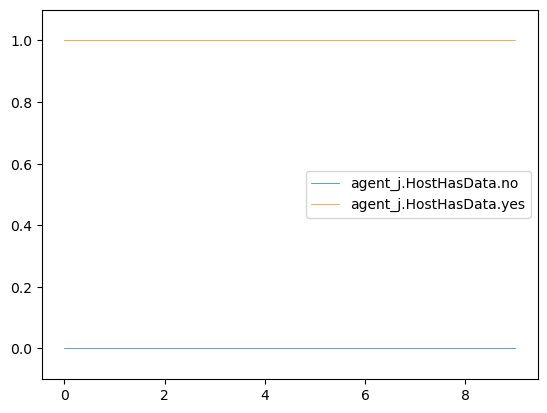

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0   EnumAccounts           LogIOCs
1                1.0                 0.0           Exit  RestrictAccPrivs
2                1.0                 0.0            Nop      DecoyAccount
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop               Nop
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0            Nop               Nop
7                1.0                 0.0            Nop               Nop
8                1.0                 0.0            Nop               Nop
9                1.0                 0.0            Nop               Nop

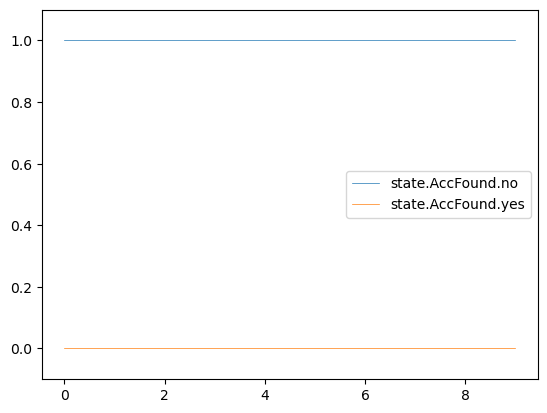

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000   EnumAccounts           LogIOCs   
1             0.943548              0.056452           Exit  RestrictAccPrivs   
2             0.943548              0.056452            Nop      DecoyAccount   
3             0.943548              0.056452            Nop               Nop   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                            auth                         none   
2                          denied                         none   
3                          denied                   user_files   
4                          denied                         none   
5                          denied                   user_files   
6                            auth                   user_files   
7                          denied                   user_files   
8                            auth                   user_files   
9                          denied                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           failure                      terminated   
3                           success                      terminated   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

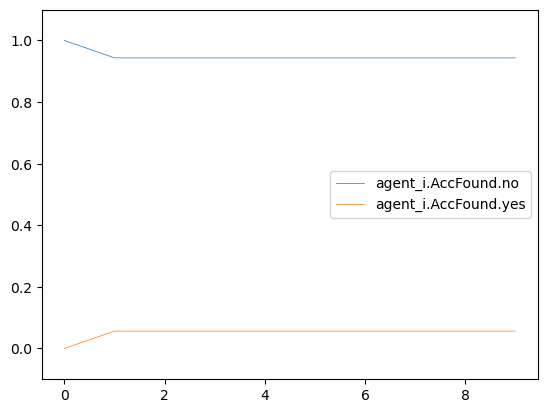

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000           LogIOCs   EnumAccounts   
1             1.000000              0.000000  RestrictAccPrivs           Exit   
2             1.000000              0.000000      DecoyAccount            Nop   
3             0.855755              0.144245               Nop            Nop   
4             0.971800              0.028200               Nop            Nop   
5             0.971889              0.028111               Nop            Nop   
6             0.993417              0.006583               Nop            Nop   
7             0.993751              0.006249               Nop            Nop   
8             0.993756              0.006244               Nop            Nop   
9             0.993756              0.006244               Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                             none  
3                             none  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

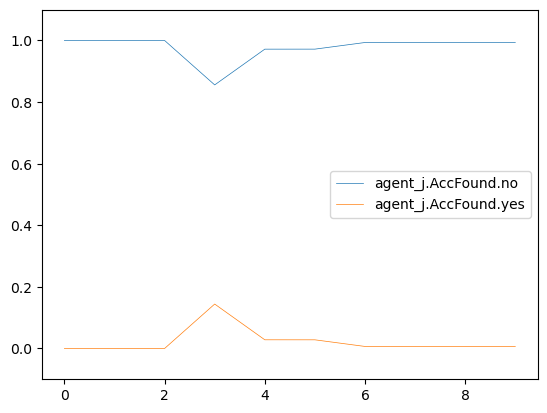

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    